In [ ]:
library(Quandl)

library(quantmod)
library(tidyverse)

library(readxl)
library(lmtest) 
library(forecast)
library(DIMORA)

library(fpp2)

library(rugarch)
library(aTSA)
library(ggplot2)
library(PerformanceAnalytics)
library(xts)
library(tseries)
library(Hmisc)
library(corrplot)
library(MLmetrics)

library(sm)
library(splines)
library(gam)

library(tree)
library (gbm)

In [ ]:
####### financial indicators
start_date <- Sys.Date()-(365*15)
end_date <- Sys.Date()
##crudeoil
cl <- getSymbols("CL=F", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="monthly", auto.assign=FALSE)
df_cl = data.frame(date = index(cl), cl, row.names=NULL)
df_cl<- na.omit(df_cl)
df_cl.ts <- ts(df_cl$CL.F.Close, frequency=12)
# df_cl.ts
##brent
bz <- getSymbols("BZ=F", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="monthly", auto.assign=FALSE)
df_bz = data.frame(date = index(bz), bz, row.names=NULL)
df_bz<- na.omit(df_bz)
df_bz.ts <- ts(df_bz$BZ.F.Close, frequency=12)
# df_bz.ts
## S&P500
sp <- getSymbols("^GSPC", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="monthly", auto.assign=FALSE)
df_sp = data.frame(date = index(sp), sp, row.names=NULL)
df_sp<- na.omit(df_sp)
df_sp.ts <- ts(df_sp$GSPC.Close, frequency=12)
# df_sp.ts
## Nasdaq
nas <- getSymbols("^IXIC", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="monthly", auto.assign=FALSE)
df_nas = data.frame(date = index(nas), nas, row.names=NULL)
df_nas<- na.omit(df_nas)
df_nas.ts <- ts(df_nas$IXIC.Close, frequency=12)
# df_nas.ts
## Gold futures
gold <- getSymbols("GC=F", verbose = TRUE, src = "yahoo", 
              from=start_date,to=end_date, periodicity="monthly", auto.assign=FALSE)
df_gold = data.frame(date = index(gold), gold, row.names=NULL)
df_gold<- na.omit(df_gold)
df_gold.ts <- ts(df_gold$GC.F.Close, frequency=12)
# df_gold.ts

## EUR/US
eus <- getSymbols("EURUSD=X", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="monthly", auto.assign=FALSE)
df_eus = data.frame(date = index(eus), eus, row.names=NULL)
df_eus<- na.omit(df_eus)
df_eus.ts <- ts(df_eus$EURUSD.X.Close, frequency=12)
# df_eus.ts
## 10-YR bond
tnx <- getSymbols("^TNX", verbose = TRUE, src = "yahoo", 
               from=start_date,to=end_date, periodicity="monthly", auto.assign=FALSE)
df_tnx = data.frame(date = index(tnx), tnx, row.names=NULL)
df_tnx<- na.omit(df_tnx)
df_tnx.ts <- ts(df_tnx$TNX.Close, frequency=12)
# df_tnx.ts

In [3]:
stock <- Quandl("JODI/OIL_CRSCBK_USA", start_date=start_date, end_date=end_date, collapse="monthly")
stock <- na.omit(stock)

brent_price <- read.csv("Europe_Brent_Spot_Price_FOB.csv")
brent_price <- na.omit(brent_price)

coil_price <- Quandl("EIA/STEO_RAIMUUS_M", start_date=start_date, end_date=end_date, collapse="monthly")
coil_price <- na.omit(coil_price)

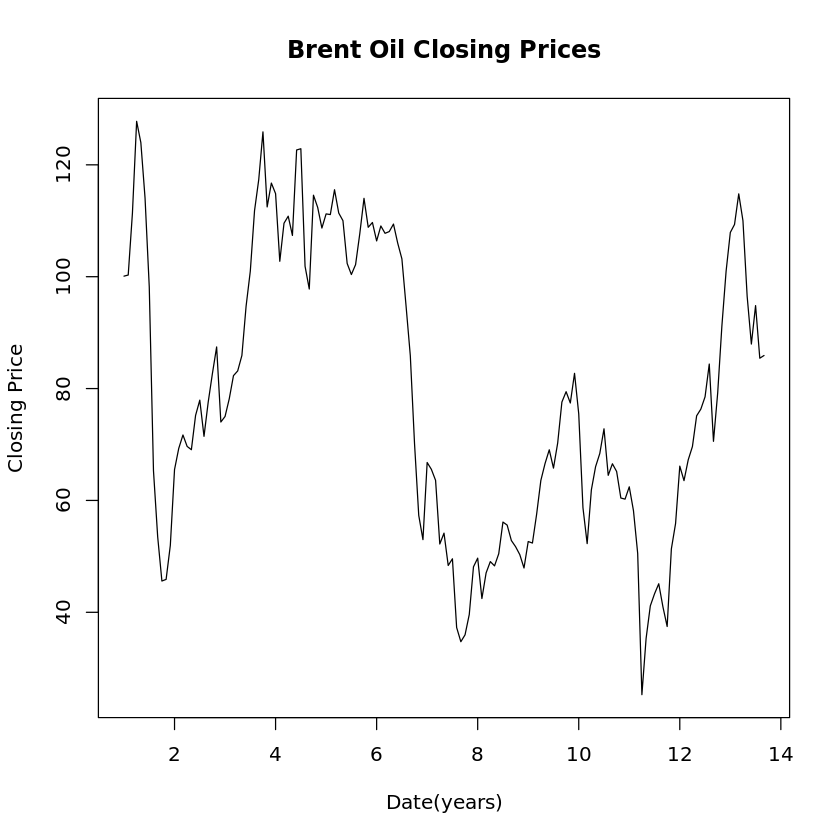

In [146]:
plot(df_bz.ts, main = "Brent Oil Closing Prices", ylab="Closing Price", xlab="Date(years)")

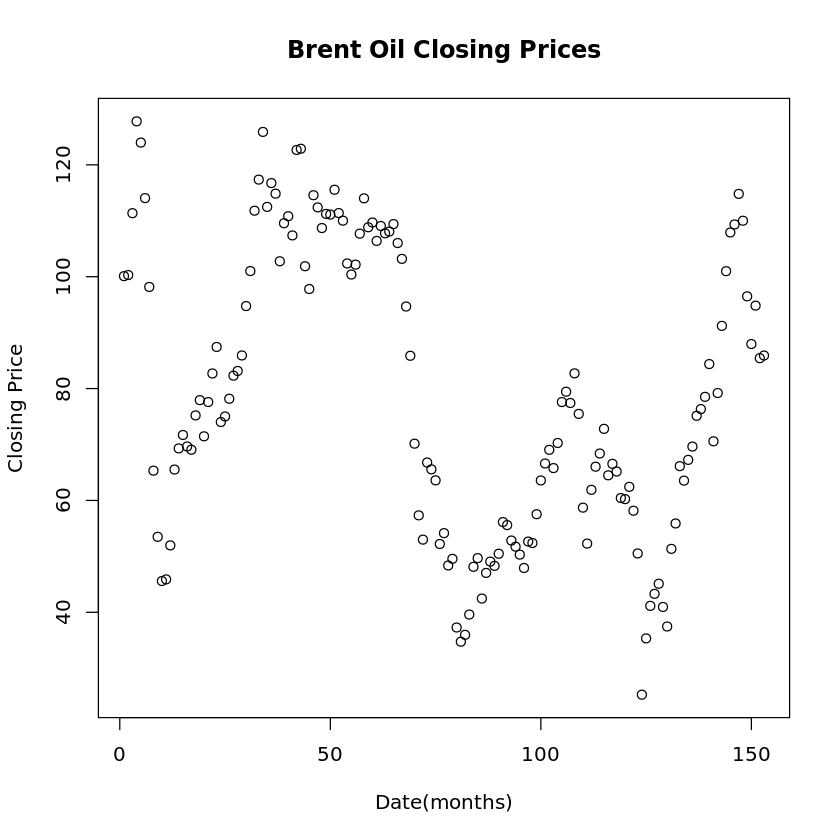

In [147]:
plot(df_bz$BZ.F.Close, main = "Brent Oil Closing Prices", ylab="Closing Price", xlab="Date(months)")

In [ ]:
## introducing the dataset and early multivariate analysis we have not concluded anything interesting so I cut out the last part of the oil_study notebook, we just keep that part

In [149]:
cbind.fill <- function(...){
    nm <- list(...) 
    nm <- lapply(nm, as.matrix)
    n <- max(sapply(nm, nrow)) 
    do.call(cbind, lapply(nm, function (x) 
        rbind(x, matrix(, n-nrow(x), ncol(x))))) 
}

In [150]:
data <- left_join(df_cl, df_bz, by = "date")
data <- left_join(data, df_sp, by = "date")
data <- left_join(data, df_nas, by = "date")
data <- left_join(data, df_gold, by = "date")
data <- left_join(data, df_eus, by = "date")
data <- left_join(data, df_tnx, by = "date")
data <- na.omit(data)

In [151]:
data <- data[,!names(data) %in% c("CL.F.Adjusted")]

In [ ]:
data[,c(10, 16, 22, 28, 36, 40)]

'data.frame':	153 obs. of  42 variables:
 $ date             : Date, format: "2008-02-01" "2008-03-01" ...
 $ CL.F.Open        : num  91.4 101.6 101.6 114.6 140.2 ...
 $ CL.F.High        : num  103 112 120 135 147 ...
 $ CL.F.Low         : num  86.2 98.7 99.6 110.3 120.4 ...
 $ CL.F.Close       : num  102 102 113 127 124 ...
 $ CL.F.Volume      : num  5352385 6349475 5854686 7054428 6083909 ...
 $ BZ.F.Open        : num  91.4 100.2 100 112.1 141.6 ...
 $ BZ.F.High        : num  101 108 118 135 147 ...
 $ BZ.F.Low         : num  86.8 97 99 108.4 121.3 ...
 $ BZ.F.Close       : num  100 100 111 128 124 ...
 $ BZ.F.Volume      : num  36154 42884 30197 32451 24095 ...
 $ BZ.F.Adjusted    : num  100 100 111 128 124 ...
 $ GSPC.Open        : num  1379 1330 1326 1386 1277 ...
 $ GSPC.High        : num  1396 1360 1405 1440 1292 ...
 $ GSPC.Low         : num  1317 1257 1324 1373 1200 ...
 $ GSPC.Close       : num  1331 1323 1386 1400 1267 ...
 $ GSPC.Volume      : num  7.85e+10 9.32e+10 8.60e+1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.27   56.13   75.13   78.45  102.76  127.78 

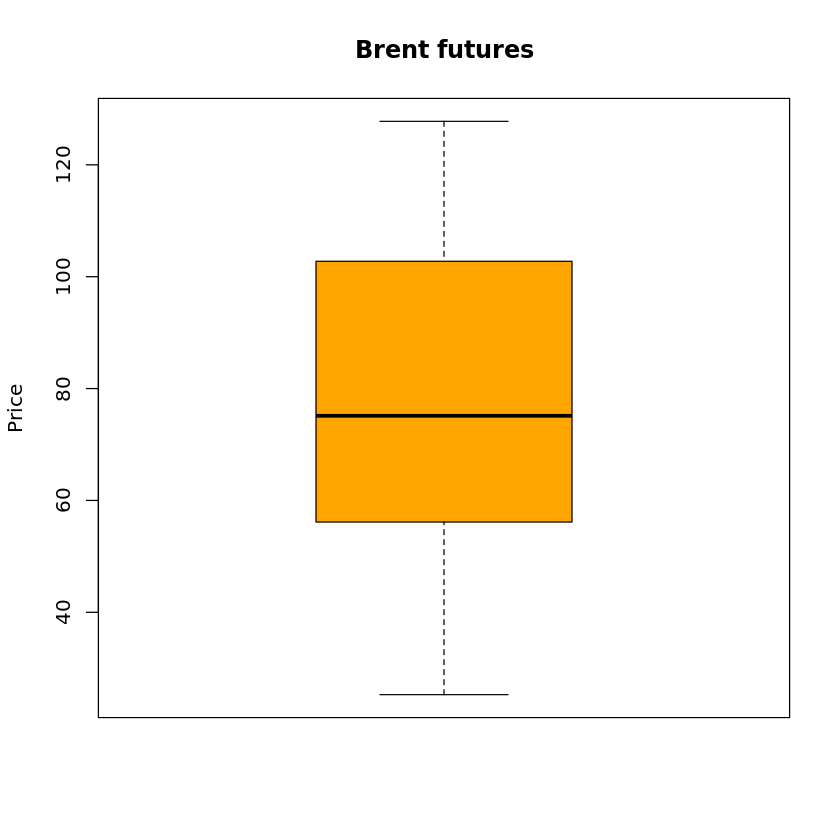

      date              CL.F.Open        CL.F.High         CL.F.Low     
 Min.   :2008-02-01   Min.   : 19.04   Min.   : 29.13   Min.   :-40.32  
 1st Qu.:2011-10-01   1st Qu.: 52.76   1st Qu.: 55.37   1st Qu.: 48.20  
 Median :2015-08-01   Median : 70.40   Median : 76.90   Median : 65.21  
 Mean   :2015-07-19   Mean   : 72.72   Mean   : 77.95   Mean   : 66.46  
 3rd Qu.:2019-04-01   3rd Qu.: 92.20   3rd Qu.: 98.24   3rd Qu.: 86.24  
 Max.   :2022-12-01   Max.   :140.18   Max.   :147.27   Max.   :120.42  
   CL.F.Close      CL.F.Volume         BZ.F.Open        BZ.F.High     
 Min.   : 18.84   Min.   : 3789627   Min.   : 22.76   Min.   : 36.43  
 1st Qu.: 52.20   1st Qu.: 5843371   1st Qu.: 55.88   1st Qu.: 63.12  
 Median : 72.89   Median : 7142807   Median : 74.25   Median : 79.70  
 Mean   : 72.61   Mean   : 8380436   Mean   : 78.44   Mean   : 83.49  
 3rd Qu.: 92.19   3rd Qu.:10673802   3rd Qu.:103.10   3rd Qu.:110.83  
 Max.   :127.35   Max.   :17972501   Max.   :141.60   Max.   :1

   CL.F.Close       GSPC.Close       IXIC.Close      GC.F.Close    
 Min.   : 18.84   Min.   : 825.9   Min.   : 1476   Min.   : 716.8  
 1st Qu.: 52.20   1st Qu.:1330.6   1st Qu.: 2781   1st Qu.:1191.5  
 Median : 72.89   Median :2059.7   Median : 4792   Median :1312.8  
 Mean   : 72.61   Mean   :2249.5   Mean   : 5979   Mean   :1386.0  
 3rd Qu.: 92.19   3rd Qu.:2912.4   3rd Qu.: 8006   3rd Qu.:1662.4  
 Max.   :127.35   Max.   :4766.2   Max.   :15645   Max.   :1967.6  
 EURUSD.X.Adjusted   TNX.Close    
 Min.   :0.983     Min.   :0.536  
 1st Qu.:1.121     1st Qu.:1.782  
 Median :1.214     Median :2.335  
 Mean   :1.236     Mean   :2.394  
 3rd Qu.:1.340     3rd Qu.:2.907  
 Max.   :1.576     Max.   :4.077  

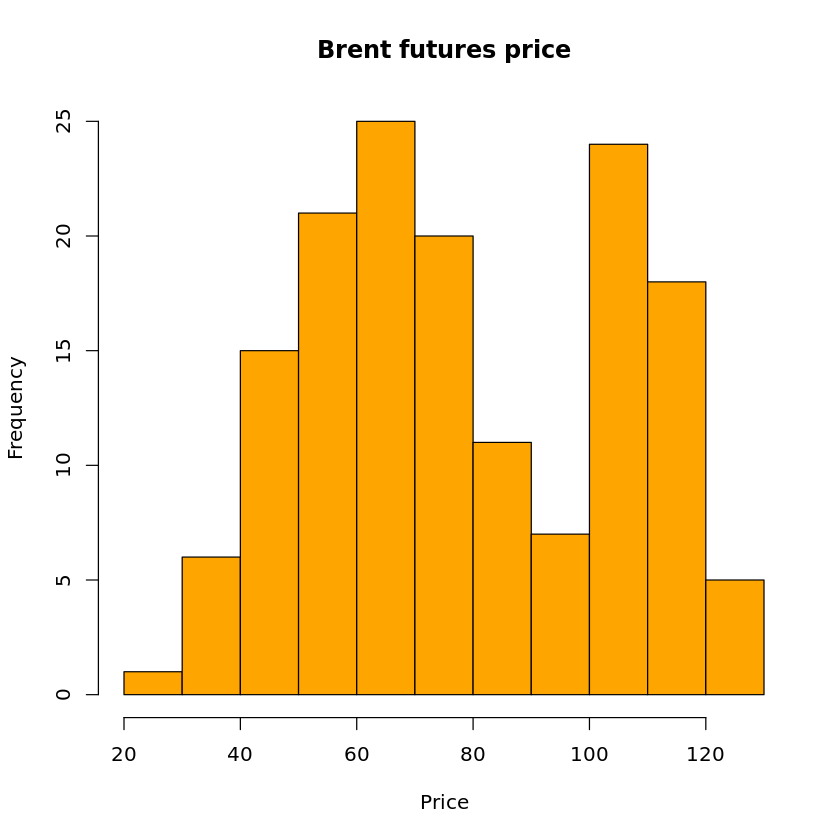

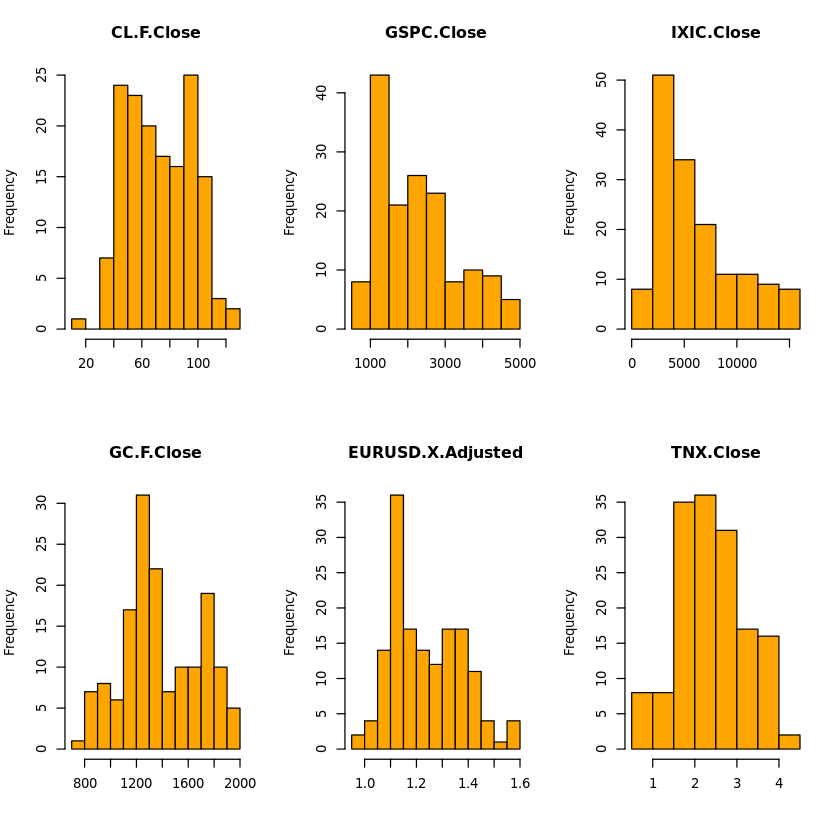

In [156]:
str(data)
# Response variable
summary(data$BZ.F.Close)
boxplot(data$BZ.F.Close, col="orange", main="Brent futures", ylab="Price")
#
hist(data$BZ.F.Close, col="orange", main="Brent futures price", xlab="Price")
#
#explanatory variables
#"CL.F.Close","GSPC.Close","IXIC.Close","GC.F.Close","EURUSD.X.Close","TNX.Close"
summary(data)

summary(data[,c(5, 16, 22, 28, 36, 40)])
par(mfrow=c(2,3))
for(i in c(5, 16, 22, 28, 36, 40)){
  hist(data[,i], col="orange", main=paste(colnames(data)[i]), xlab="")
}

In [157]:
summary(df_bz.ts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.27   56.13   75.13   78.45  102.76  127.78 

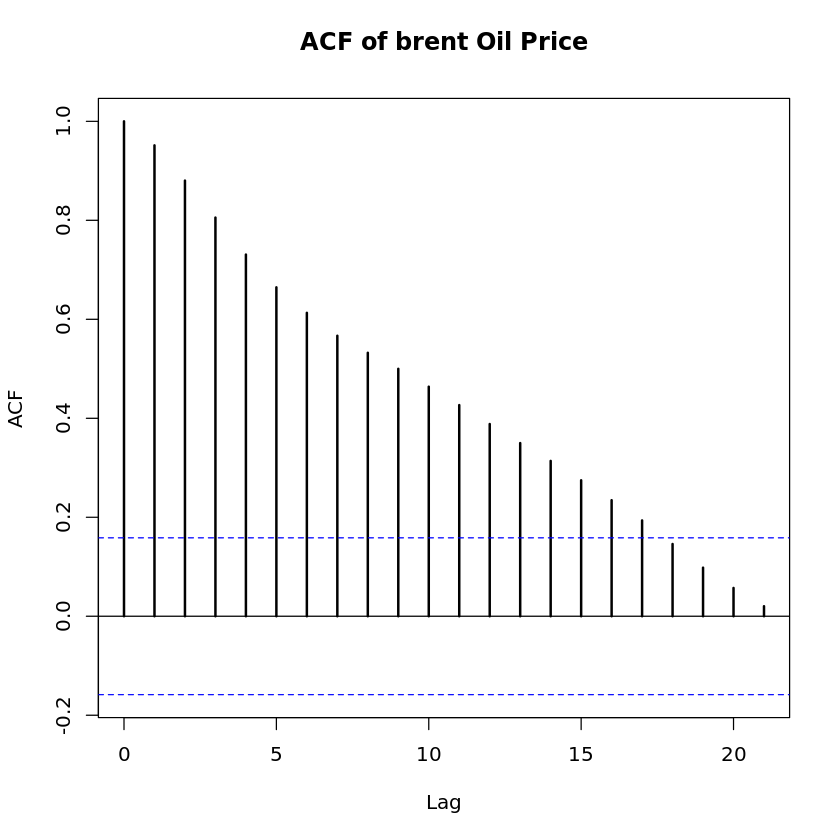

In [161]:
# df_cl.ts <- ts(df_cl$CL.F.Close, frequency=12)
# df_cl.ts
acf(as.numeric(df_bz.ts), main='ACF of brent Oil Price', col='black', lwd=2)

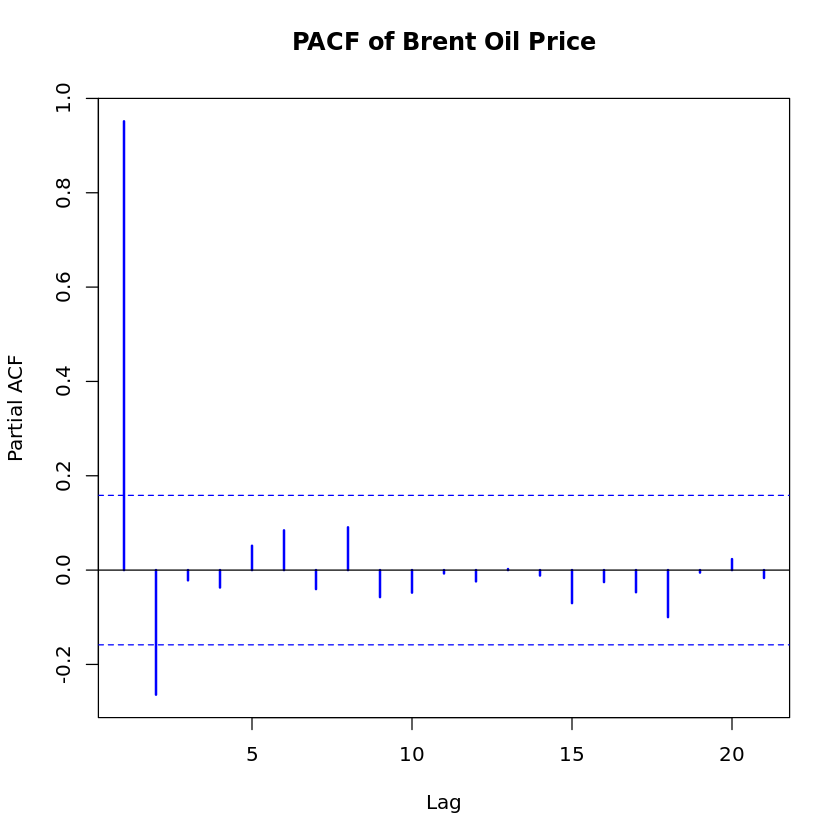

In [163]:
pacf(as.numeric(df_bz.ts), main='PACF of Brent Oil Price', col='blue', lwd=2)

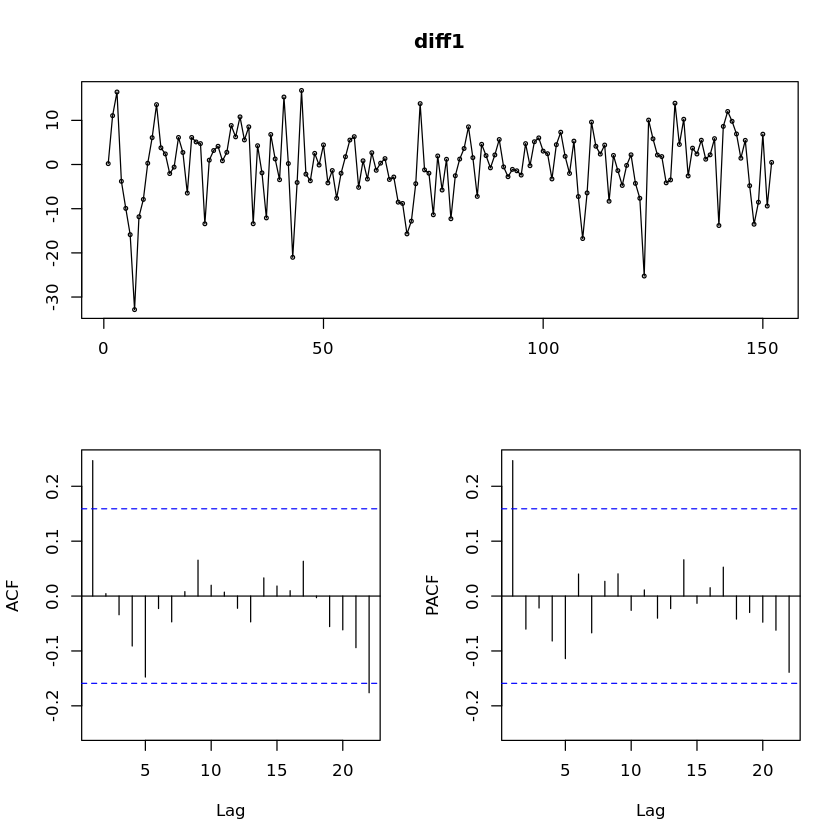

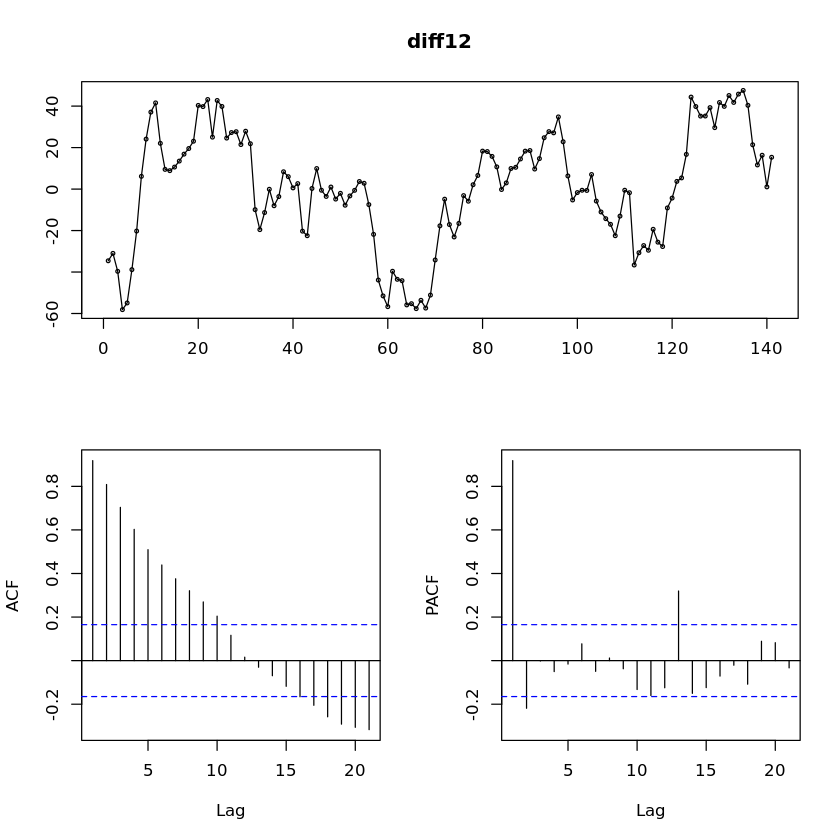

In [244]:
diff1<- diff(df_bz$BZ.F.Close) ##first difference
diff12<- diff(df_bz$BZ.F.Close, lag=12) ###seasonal difference
tsdisplay(diff1)
tsdisplay(diff12)

In [164]:
##portmanteau tests
Box.test(df_bz.ts,lag = 1, type = "Ljung-Box")
Box.test(df_bz.ts,lag = 4, type = "Ljung-Box")
Box.test(df_bz.ts,lag = 8, type = "Ljung-Box")
Box.test(df_bz.ts,lag = 12, type = "Ljung-Box")

Box.test(df_bz.ts,lag = 1, type = "Box-Pierce")
Box.test(df_bz.ts,lag = 4, type = "Box-Pierce")
Box.test(df_bz.ts,lag = 8, type = "Box-Pierce")
Box.test(df_bz.ts,lag = 12, type = "Box-Pierce")
 


	Box-Ljung test

data:  df_bz.ts
X-squared = 141.24, df = 1, p-value < 2.2e-16



	Box-Ljung test

data:  df_bz.ts
X-squared = 450.52, df = 4, p-value < 2.2e-16



	Box-Ljung test

data:  df_bz.ts
X-squared = 680.45, df = 8, p-value < 2.2e-16



	Box-Ljung test

data:  df_bz.ts
X-squared = 813.06, df = 12, p-value < 2.2e-16



	Box-Pierce test

data:  df_bz.ts
X-squared = 138.51, df = 1, p-value < 2.2e-16



	Box-Pierce test

data:  df_bz.ts
X-squared = 438.05, df = 4, p-value < 2.2e-16



	Box-Pierce test

data:  df_bz.ts
X-squared = 655.63, df = 8, p-value < 2.2e-16



	Box-Pierce test

data:  df_bz.ts
X-squared = 777.72, df = 12, p-value < 2.2e-16


In [165]:
##figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root
kpss.test(df_bz.ts, null="Trend")

Warning message in kpss.test(df_bz.ts, null = "Trend"):
“p-value smaller than printed p-value”



	KPSS Test for Trend Stationarity

data:  df_bz.ts
KPSS Trend = 0.23949, Truncation lag parameter = 4, p-value = 0.01


In [166]:
##Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not
##augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample
adf.test(df_bz.ts)


	Augmented Dickey-Fuller Test

data:  df_bz.ts
Dickey-Fuller = -1.9614, Lag order = 5, p-value = 0.5925
alternative hypothesis: stationary


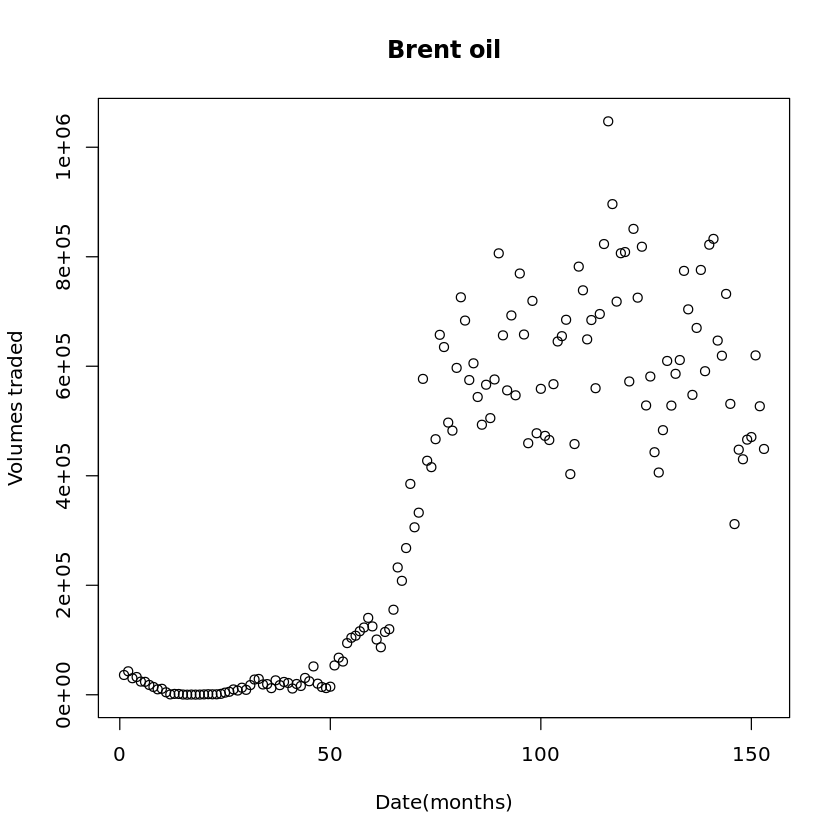

In [167]:
## study on the volume of trade
plot(df_bz$BZ.F.Volume, main = "Brent oil", ylab="Volumes traded", xlab="Date(months)")

In [76]:
df_cl_vol.ts <- ts(df_bz$BZ.F.Volume, frequency=12)

In [77]:
tt<- 1:NROW(df_bz$BZ.F.Volume) #create time variable

Call: ( Standard Bass Model )

  BM(series = vol_bz, display = T)

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1797331  -847712  -279025  -185257   147462  1772761 

Coefficients:
       Estimate    Std.Error        Lower        Upper   p-value    
m 5.771021e+07 7.377843e+05 5.626418e+07 5.915625e+07 1.11e-121 ***
p 1.279477e-04 8.646734e-06 1.110004e-04 1.448950e-04  6.50e-31 ***
q 5.376836e-02 1.000881e-03 5.180667e-02 5.573005e-02  1.62e-98 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  924632  on  147  degrees of freedom
 Multiple R-squared:   0.9983158  Residual squared sum:  1.325347e+14

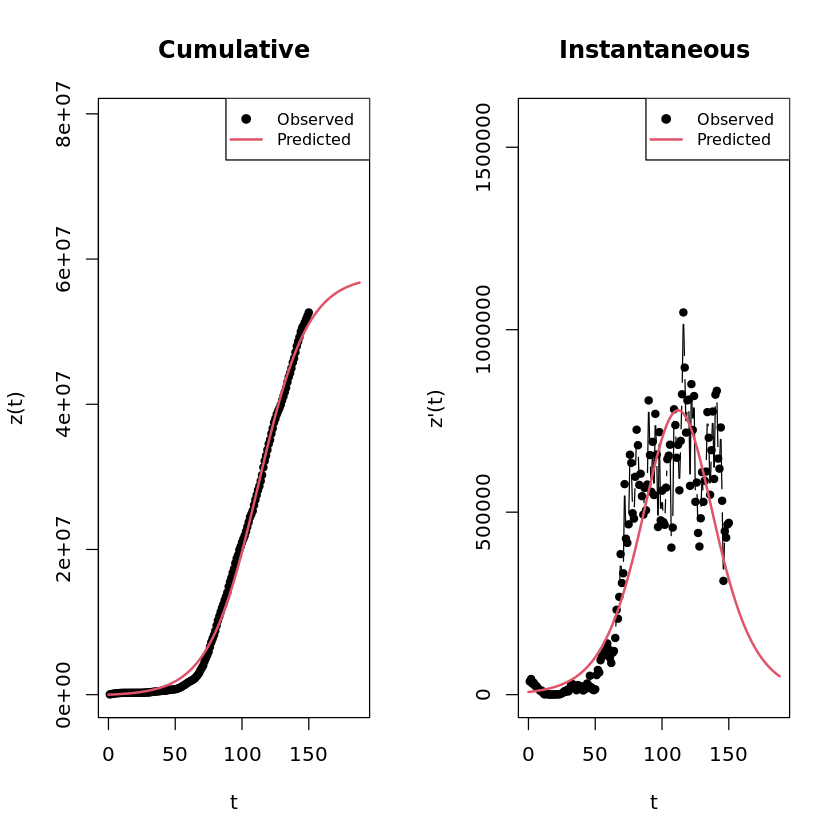

In [79]:
###we estimate a simple Bass Model 
vol_bz<- df_bz$BZ.F.Volume[1:150]
bm<-BM(vol_bz,display = T)
summary(bm)


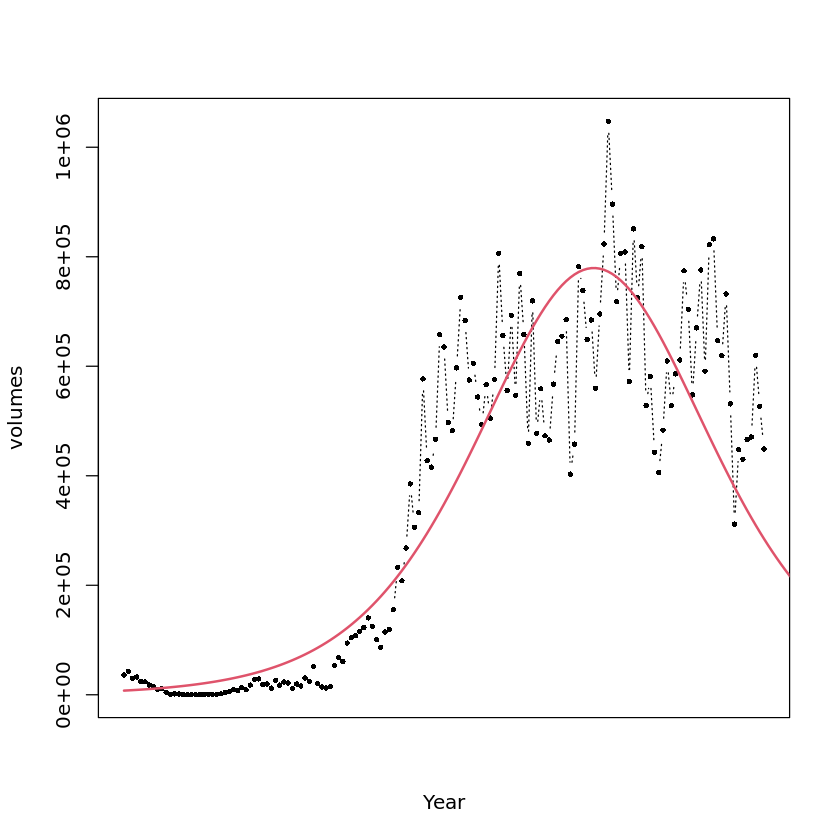

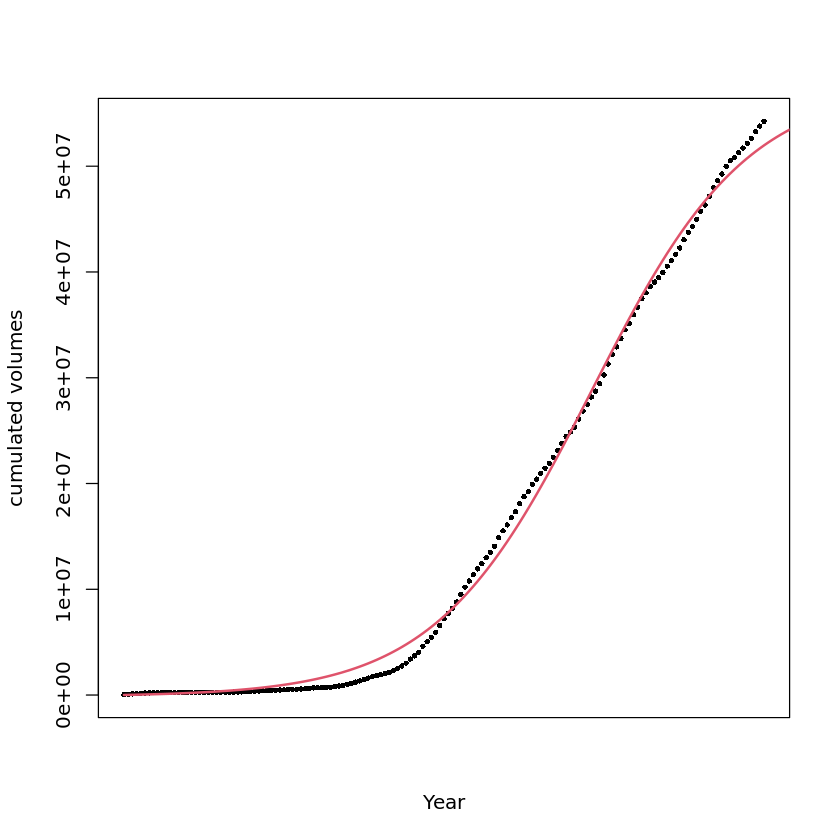

In [80]:
###prediction (out-of-sample)
pred_bm<- predict((bm), newx=c(1:180))
pred.inst<- make.instantaneous(pred_bm)

###plot of fitted model 
plot(df_bz$BZ.F.Volume, type= "b",xlab="Year", ylab="volumes",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred.inst, lwd=2, col=2)

plot(cumsum(df_bz$BZ.F.Volume), type= "b",xlab="Year", ylab="cumulated volumes",  pch=16, lty=3, xaxt="n", cex=0.6)
lines(pred_bm, lwd=2, col=2)

In [96]:
# ###GBMr1  
# GBMr1<- GBM(df_bz$BZ.F.Volume,shock = "rett",nshock = 1, prelimestimates=c(-1,1,-1.149660e+00,1,-2.354331e+00,1))
# summary(GBMr1)

# pred_GBMr1<- predict(GBMr1, newx=c(1:30))
# pred_GBMr1.inst<- make.instantaneous(pred_GBMr1)

# plot(df_bz$BZ.F.Volume, type= "b",xlab="", ylab="",  pch=16, lty=3, cex=0.6)
# lines(pred_GBMr1.inst, lwd=2, col=2)

In [99]:
######GBMe1

# GBMe1<- GBM(df_bz$BZ.F.Volume,shock = "exp",nshock = 1,prelimestimates = c(-1,1,-1.149660e+00,1,-2.354331e+00,1))
# summary(GBMe1)

# pred_GBMe1<- predict(GBMe1, newx=c(1:50))
# pred_GBMe1.inst<- make.instantaneous(pred_GBMe1)

# plot(df_bz$BZ.F.Volume, type= "b",xlab="", ylab="",  pch=16, lty=3, cex=0.6, xlim=c(1,60))
# lines(pred_GBMe1.inst, lwd=2, col=2)

Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”
Warning message in sqrt((1 - exp(-(pc + qc) * t))/(1 + (qc/pc) * exp(-(pc + qc) * :
“NaNs produced”


Call: ( Guseo Guidolin Model )

  GGM(series = df_bz$BZ.F.Volume, prelimestimates = c(78635040, 
    0.0001920458, 0.03327964, 0.0002936826, 0.0621129))

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-648922 -125708  220948   95153  288185  804882 

Coefficients:
          Estimate    Std.Error        Lower        Upper   p-value    
K    6.617821e+07 9.420014e+05 6.433192e+07 6.802450e+07 1.47e-115 ***
pc   3.632092e-05 3.307011e-06 2.983930e-05 4.280255e-05  6.74e-21 ***
qc   5.219300e-02 1.212710e-03 4.981613e-02 5.456986e-02  1.42e-85 ***
ps   4.444020e-05 8.916640e-06 2.696391e-05 6.191649e-05  1.72e-06 ***
qs   1.043500e-01 3.605056e-03 9.728427e-02 1.114158e-01  8.10e-63 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  295732.2  on  148  degrees of freedom
 Multiple R-squared:   0.9997029  Residual squared sum:  1.467883e+13

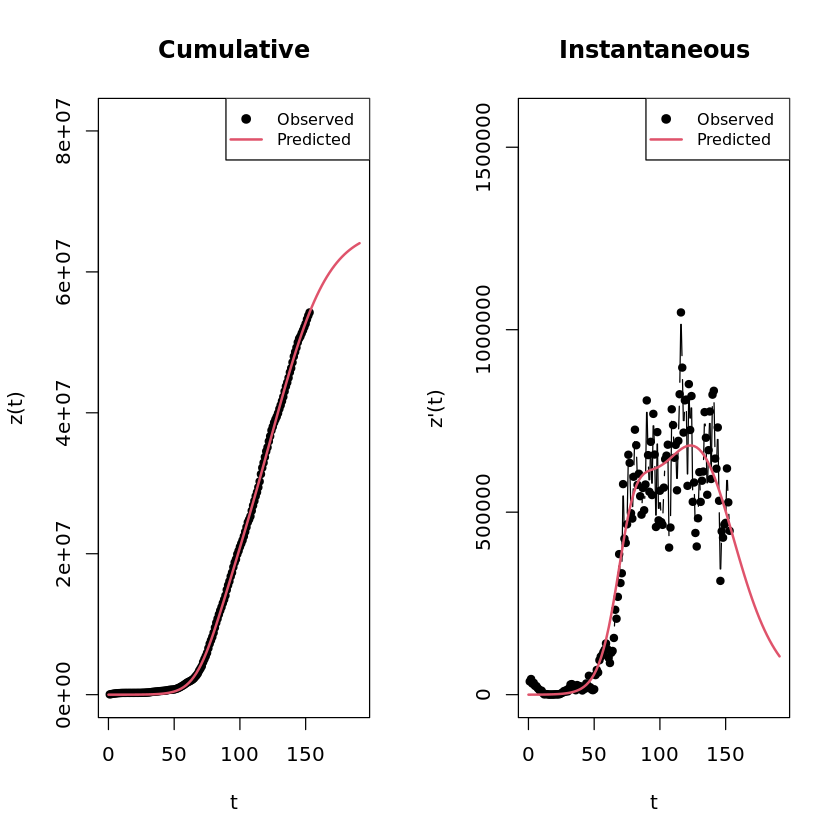

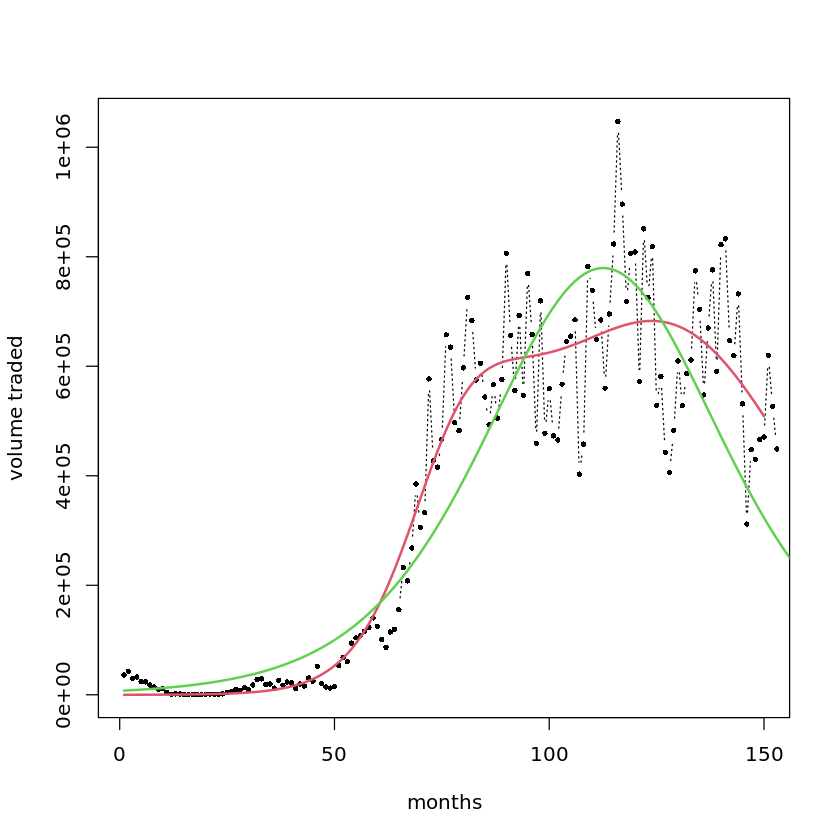

In [127]:
######GGM 
GGM<- GGM(df_bz$BZ.F.Volume, prelimestimates=c(7.863504e+07, 1.920458e-04,3.327964e-02,2.936826e-04,6.211290e-02))
summary(GGM)

pred_GGM<- predict(GGM, newx=c(1:150))
pred_GGM.inst<- make.instantaneous(pred_GGM)

plot(df_bz$BZ.F.Volume, type= "b",xlab="months", ylab="volume traded",  pch=16, lty=3, cex=0.6, xlim=c(1,150))
lines(pred_GGM.inst, lwd=2, col=2)
lines(pred.inst, lwd=2, col=3)

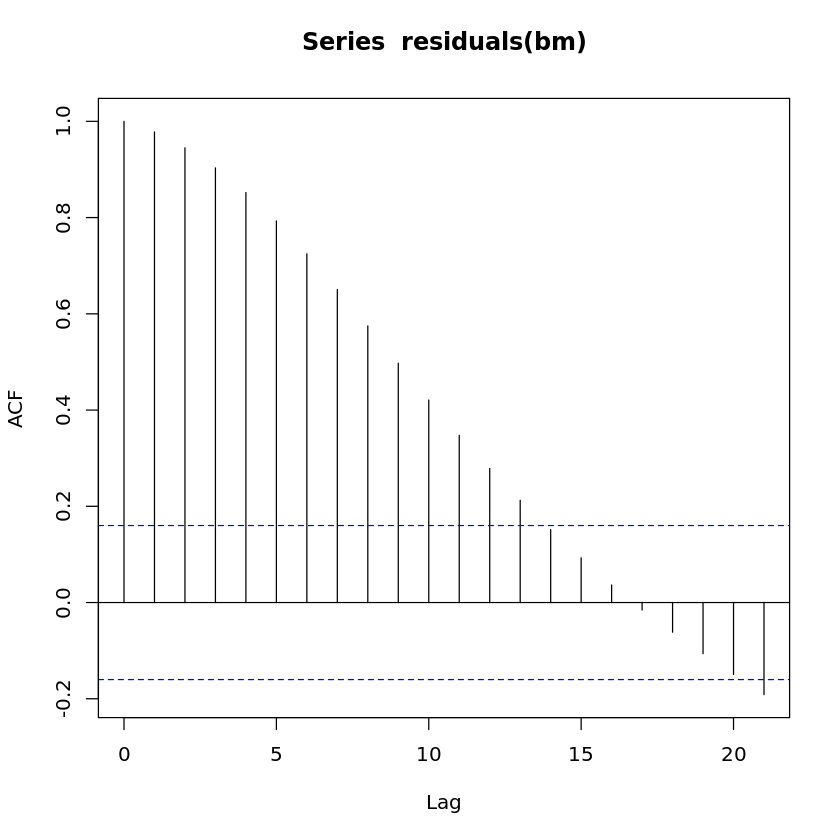

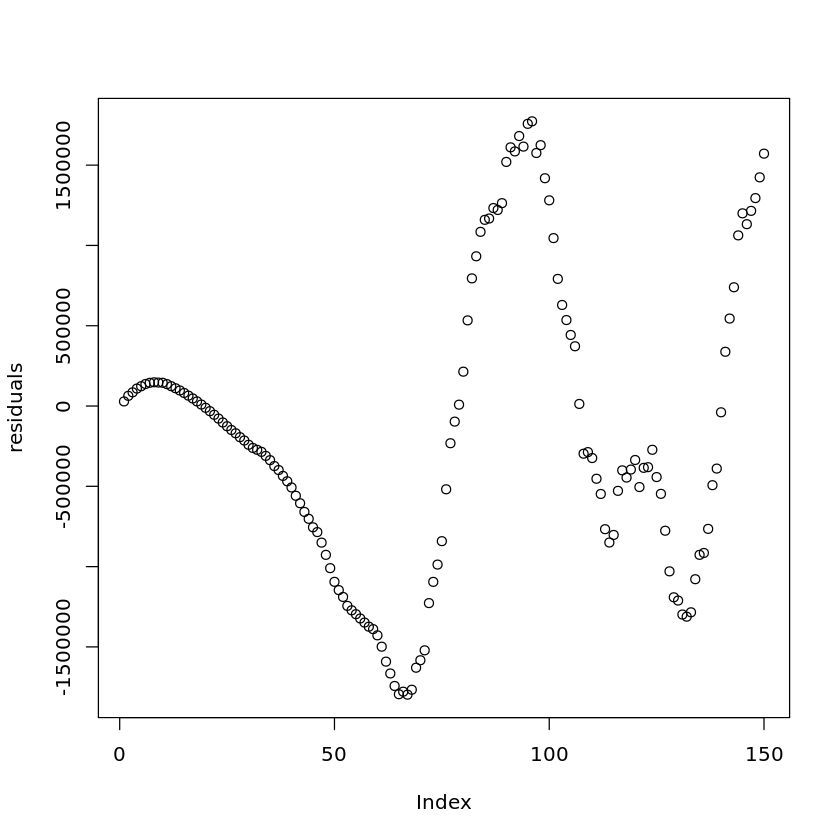

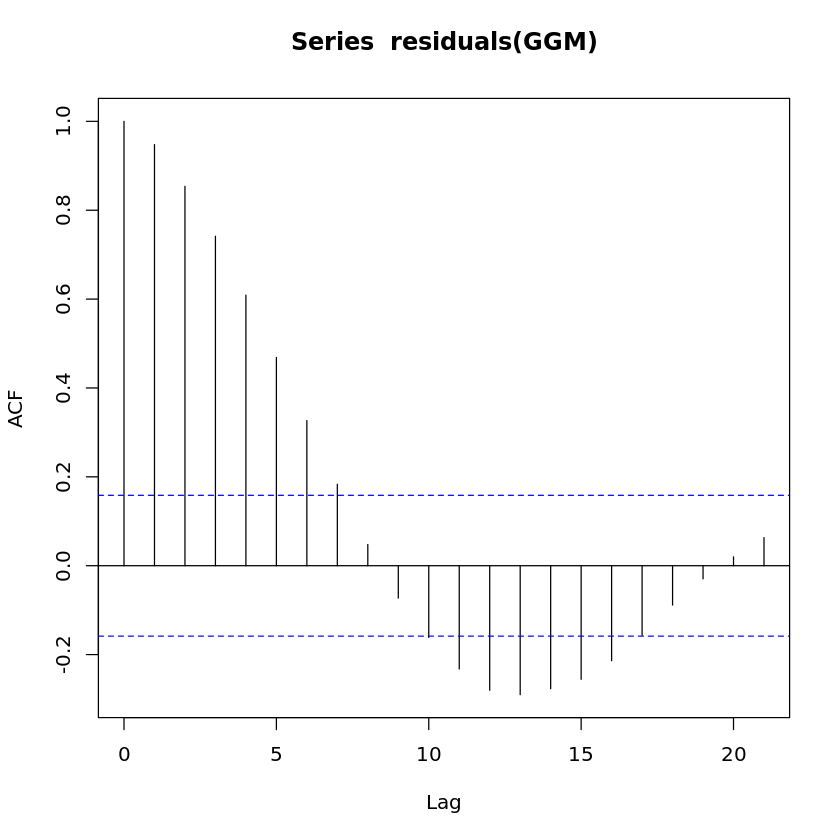

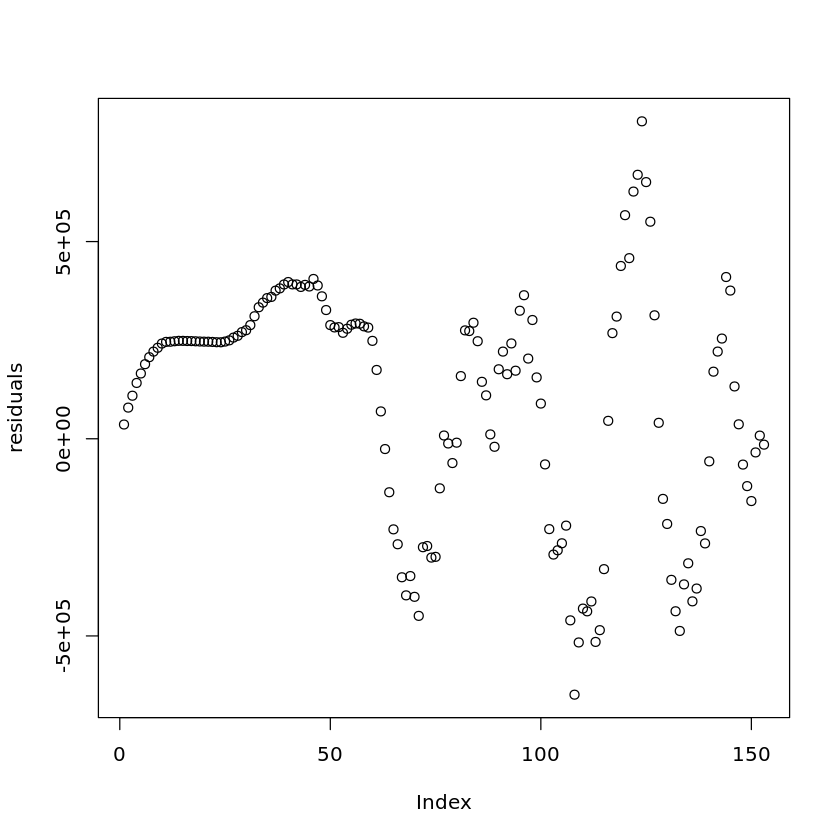

In [142]:
###Analysis of residuals
##durbin wattson test: detect the presence of autocorrelation in the residuals of a regression
res_bm<- residuals(bm)
acf<- acf(residuals(bm))

fit_bm<- fitted(bm)
fit_bm_inst<- make.instantaneous(fit_bm)

plot(res_bm, ylab="residuals")

res_GGM<- residuals(GGM)
acf<- acf(residuals(GGM))

fit_GGM<- fitted(GGM)
fit_GGM_inst<- make.instantaneous(fit_GGM)

plot(res_GGM, ylab="residuals")

In [ ]:
### now we forecast brent prices


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,100.10,100.30,111.36,127.78,123.98,114.05,98.17,65.32,53.49,45.59,45.88,51.96
2,65.52,69.30,71.70,69.65,69.07,75.20,77.93,71.46,77.59,82.70,87.44,74.02
3,75.01,78.18,82.31,83.15,85.92,94.75,101.01,111.80,117.36,125.89,112.48,116.74
4,114.85,102.76,109.56,110.82,107.38,122.66,122.88,101.87,97.80,114.57,112.39,108.70
5,111.23,111.11,115.55,111.38,110.02,102.37,100.39,102.16,107.70,114.01,108.84,109.69
6,106.40,109.07,107.76,108.07,109.41,106.02,103.19,94.67,85.86,70.15,57.33,52.99
7,66.78,65.56,63.59,52.21,54.15,48.37,49.56,37.28,34.74,35.97,39.60,48.13
8,49.68,42.46,47.04,49.06,48.30,50.47,56.13,55.59,52.83,51.73,50.31,47.92
9,52.65,52.38,57.54,63.57,66.60,69.05,65.78,70.27,77.59,79.44,77.42,



Call:
tslm(formula = brent1 ~ trend + season)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.538 -18.005  -3.006  23.347  36.823 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 100.96898    9.16934  11.012  < 2e-16 ***
trend        -0.37755    0.07853  -4.808 5.78e-06 ***
season2      -0.85578   11.77051  -0.073    0.942    
season3       3.44288   11.77130   0.292    0.771    
season4       4.85155   11.77261   0.412    0.681    
season5       5.13354   11.77444   0.436    0.664    
season6       6.41221   11.77680   0.544    0.587    
season7       5.91198   11.77968   0.502    0.617    
season8      -0.89046   11.78308  -0.076    0.940    
season9      -1.11958   11.78701  -0.095    0.925    
season10      0.93464   11.79145   0.079    0.937    
season11     -1.83892   11.79642  -0.156    0.876    
season12     -4.31238   12.13885  -0.355    0.723    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard er

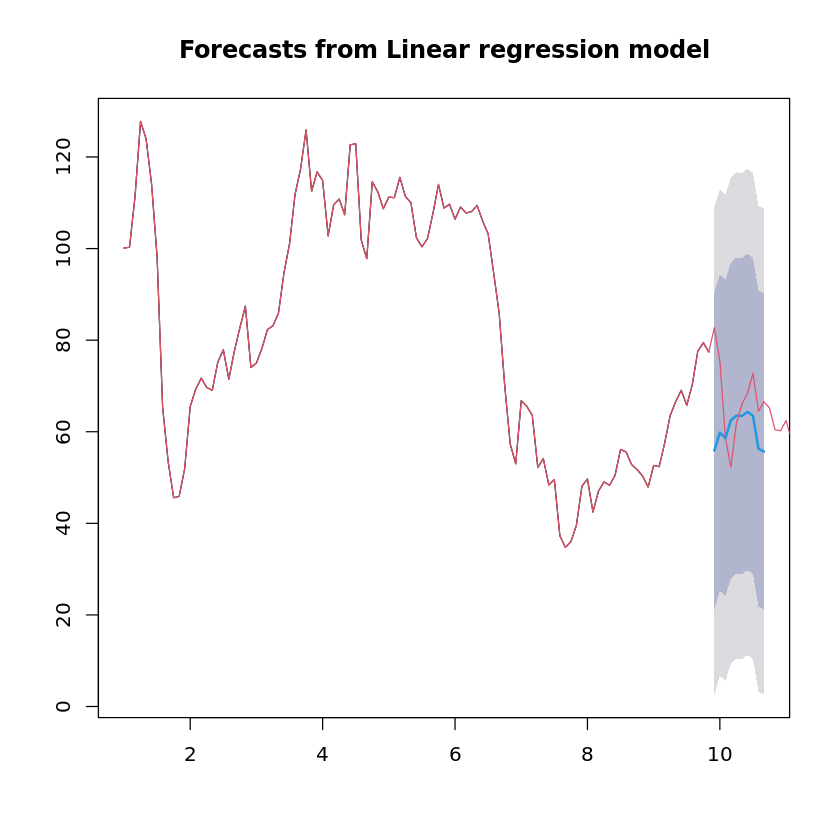

In [173]:
brent1<- window(df_bz.ts, start=1, end=9 +.9)
brent1

m1<- tslm(brent1~ trend+ season)
summary(m1)
fit<- fitted(m1)

fore <- forecast(m1)
plot(fore)
lines(df_bz.ts, col=2)

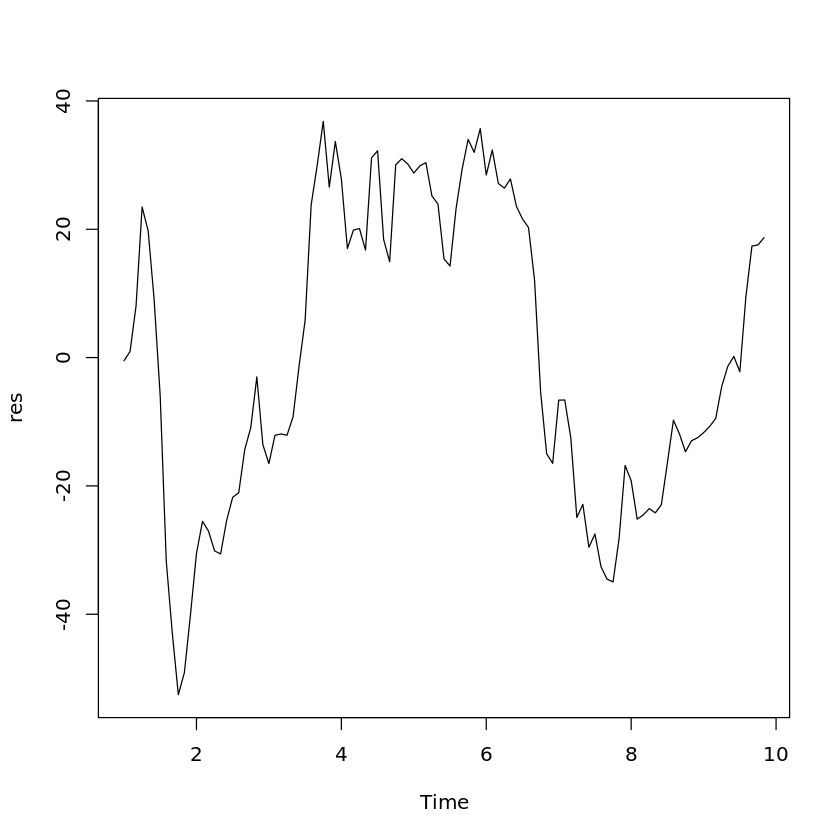


	Durbin-Watson test

data:  m1
DW = 0.090957, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


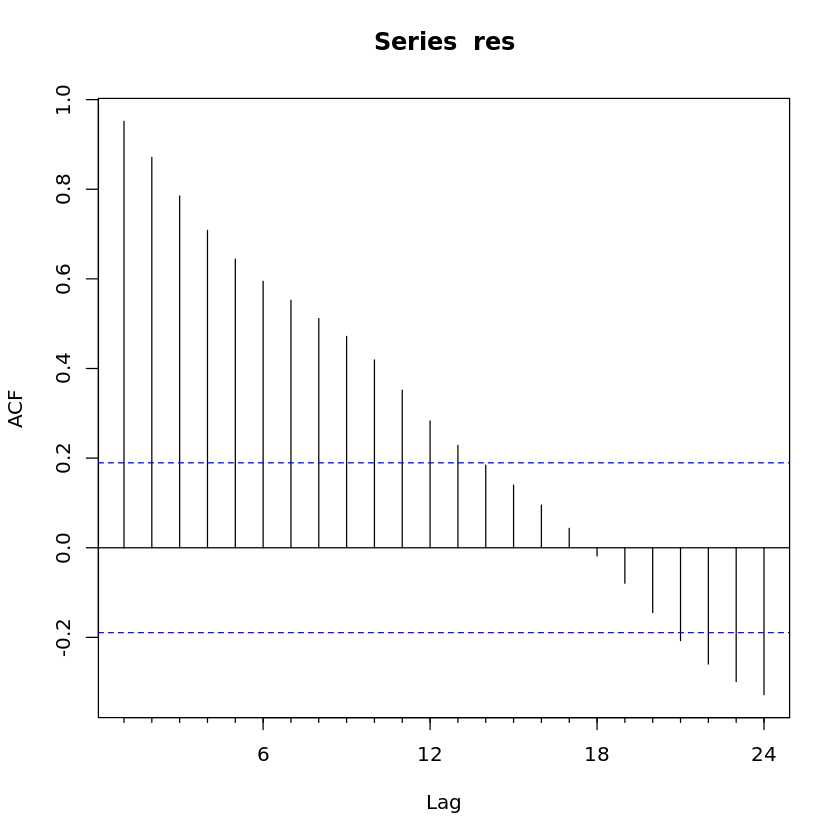

In [175]:
#analysis of residuals
res<- residuals(m1) 
plot(res) 
#the form of residuals seems to indicate the presence of negative autocorrelation
Acf(res)

dw<- dwtest(m1, alt="two.sided")
dw

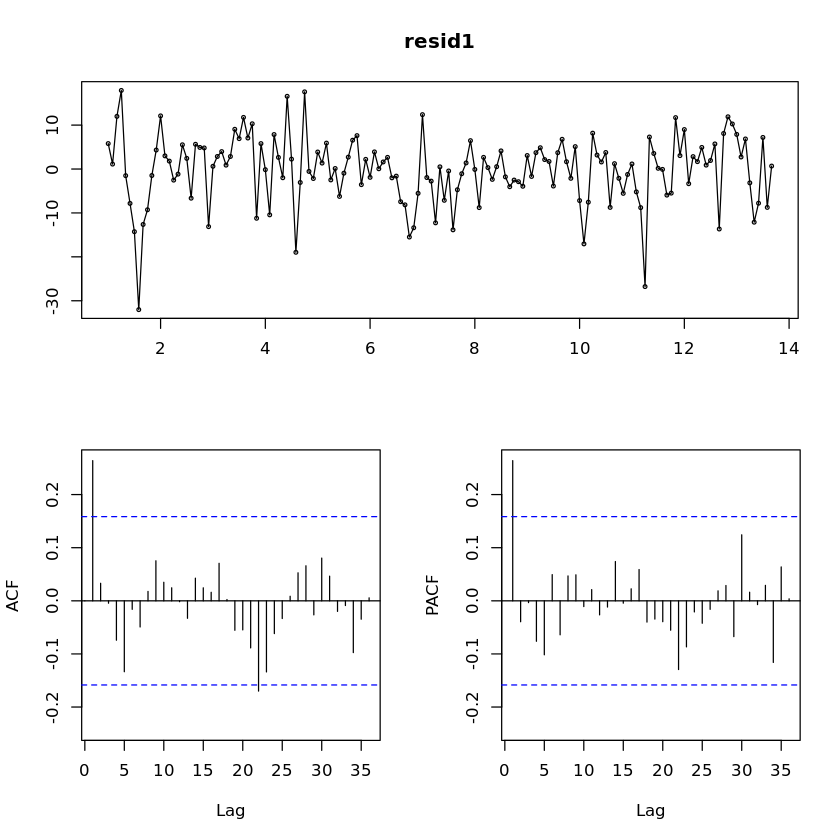

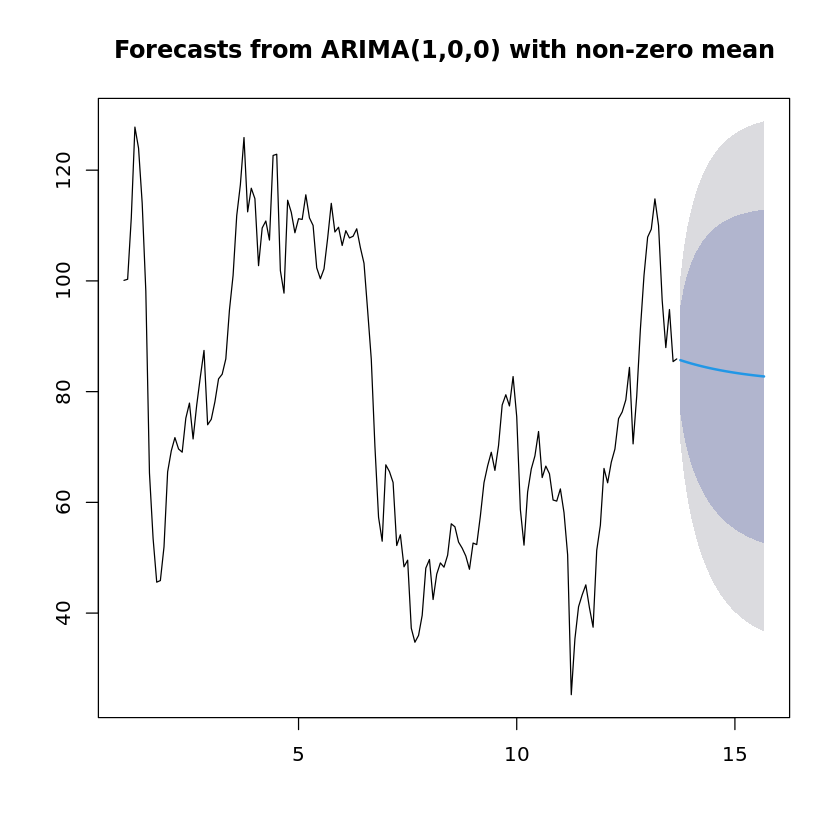

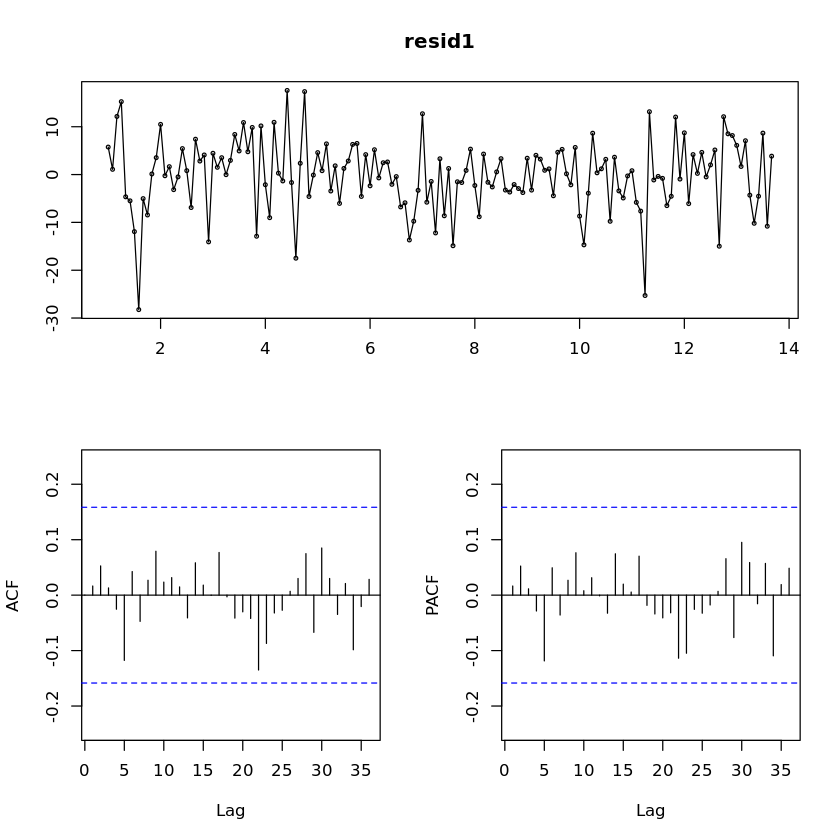

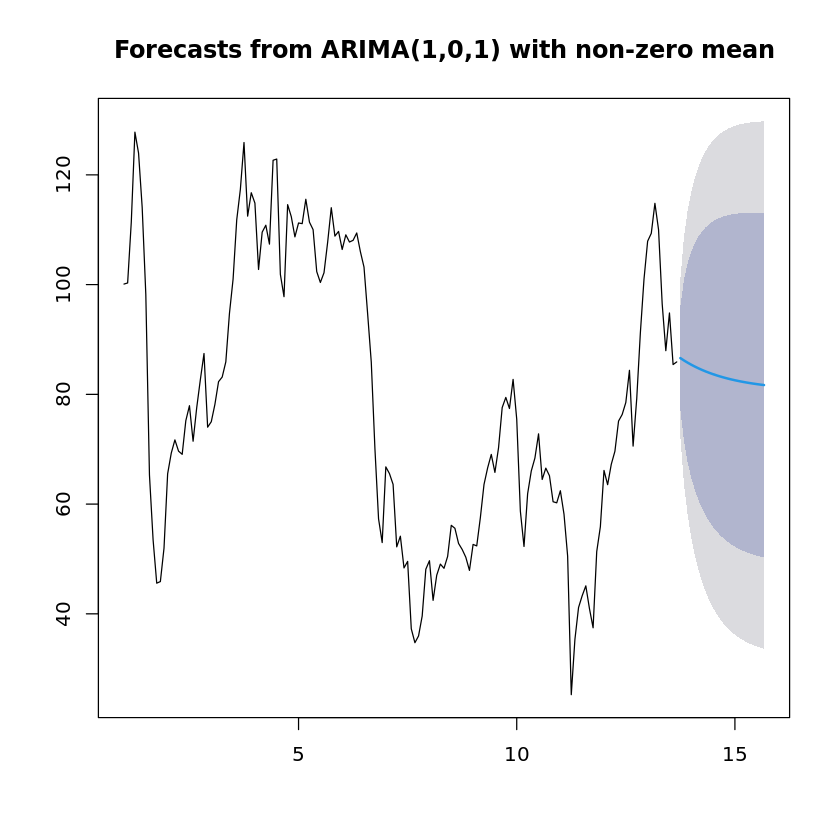

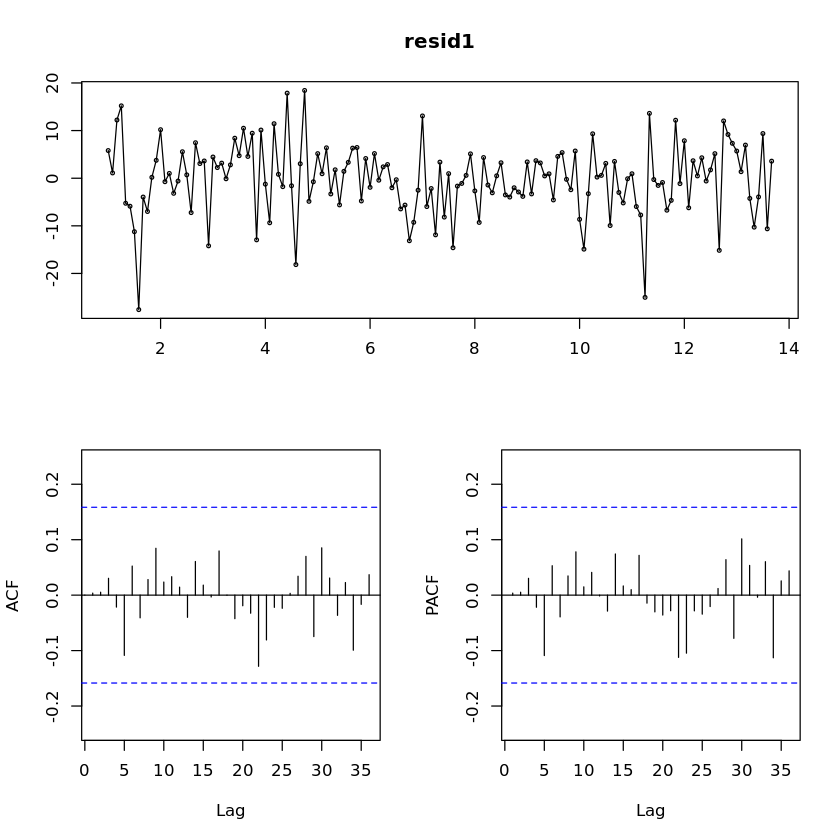

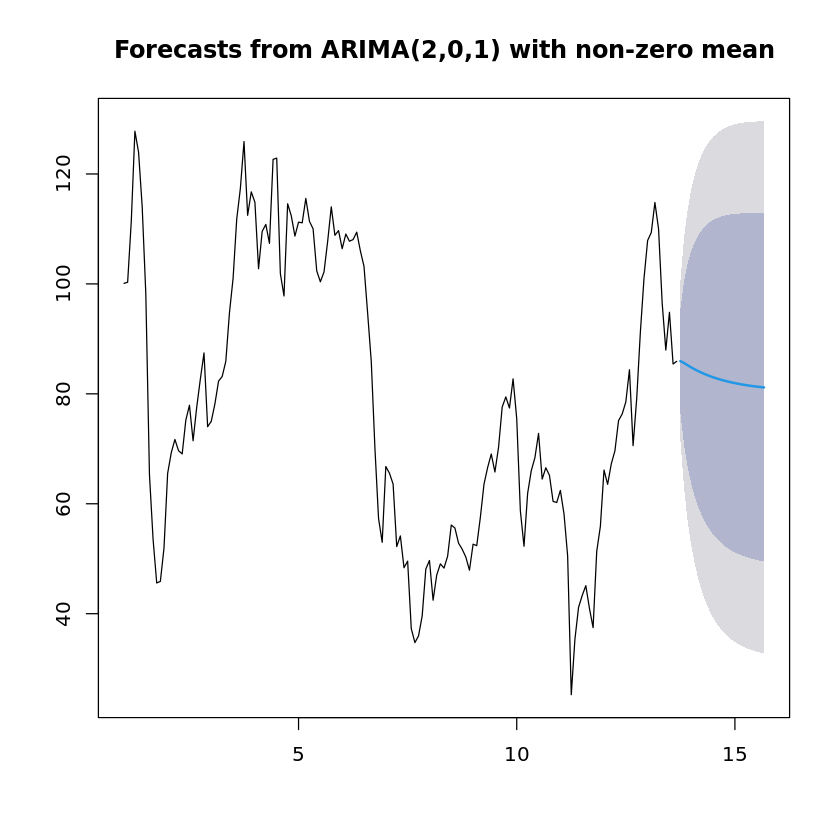

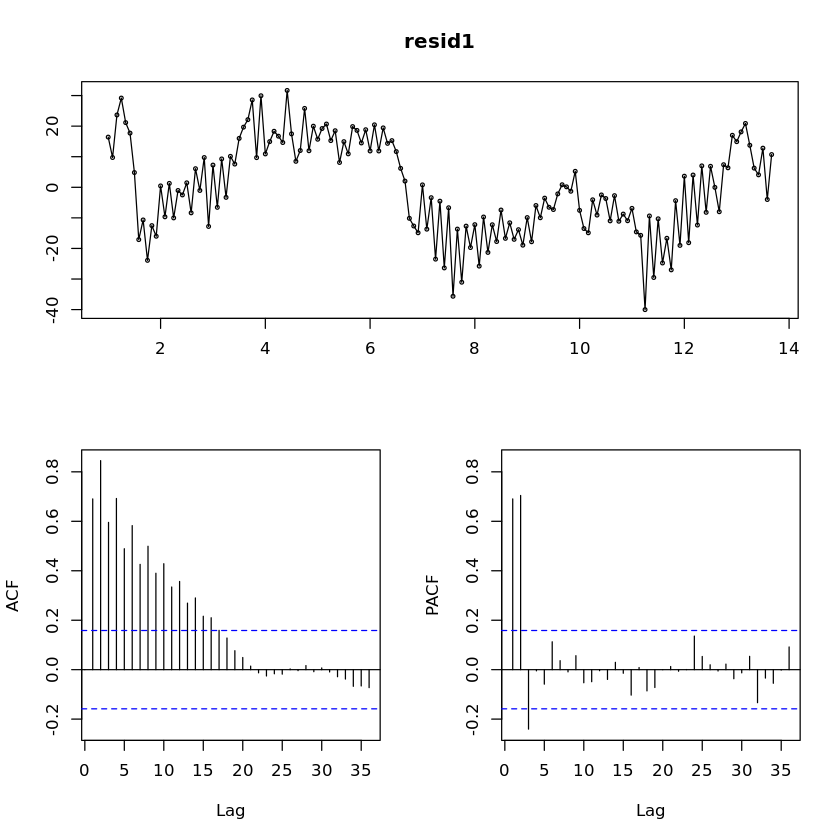

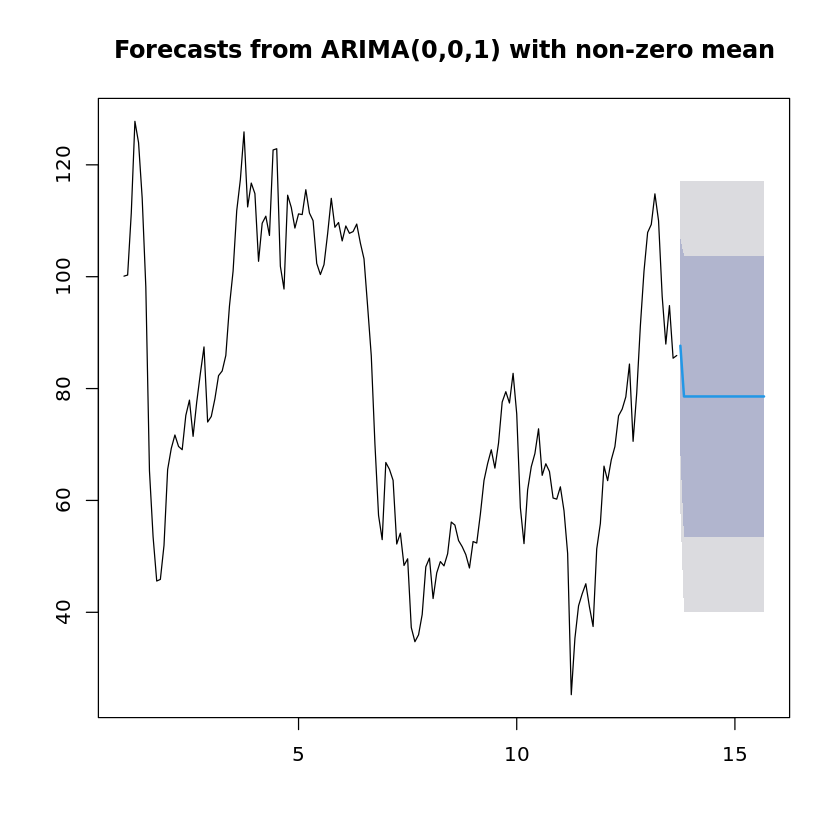

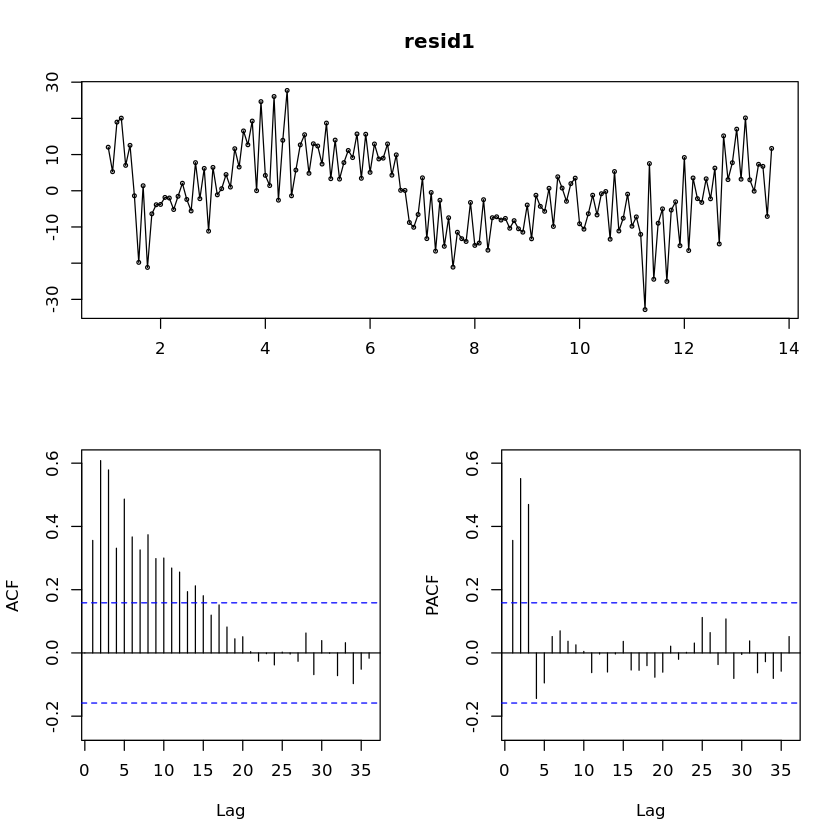

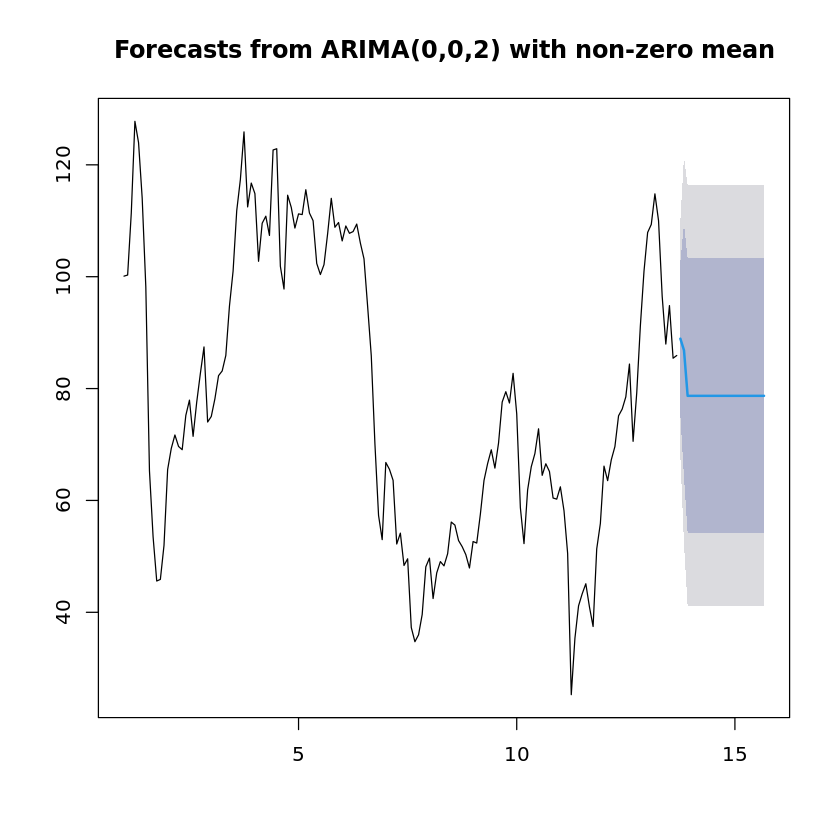

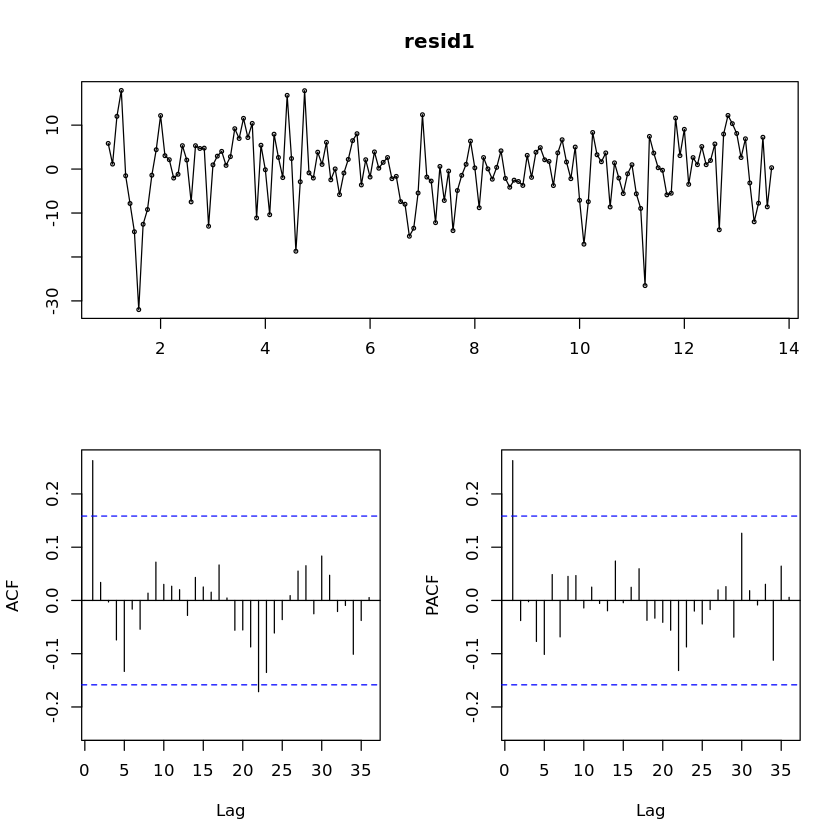

,df,AIC
,<dbl>,<dbl>
f1,3,1064.712
f2,4,1055.089
f3,5,1056.684
f4,3,1269.986
f5,4,1172.387
f6,4,1066.648


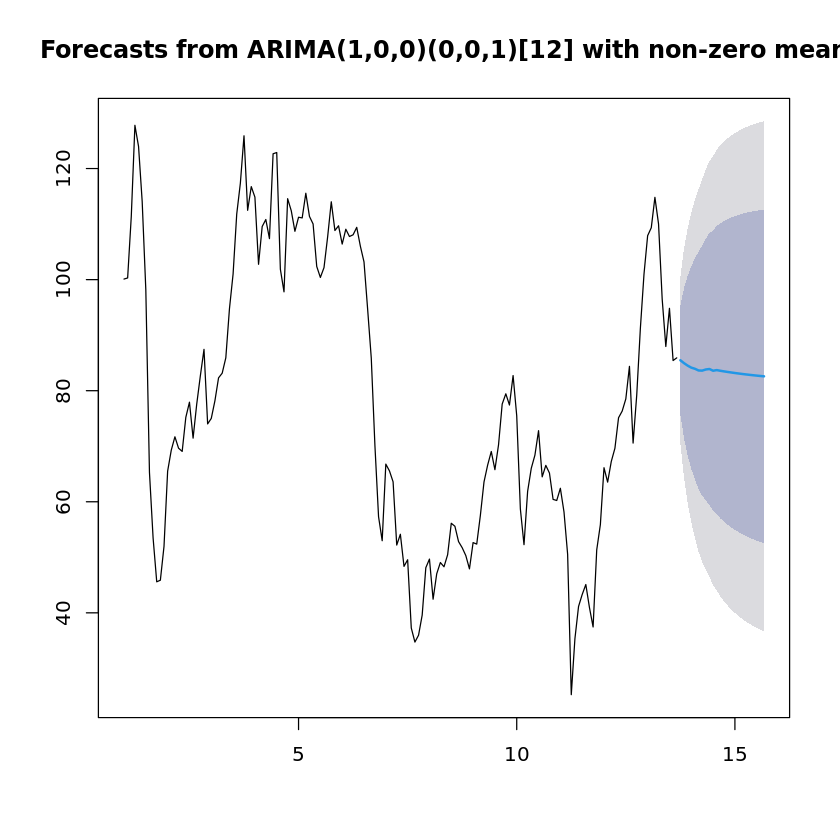

In [178]:
# best arima model
f1 = arima(df_bz.ts,order = c(1,0,0))
resid1<- residuals(f1)
tsdisplay(resid1)
for1<- forecast(f1)
plot(for1)

f2 = arima(df_bz.ts,order = c(1,0,1))
resid1<- residuals(f2)
tsdisplay(resid1)
for2<- forecast(f2)
plot(for2)

f3 = arima(df_bz.ts,order = c(2,0,1))
resid1<- residuals(f3)
tsdisplay(resid1)
for3<- forecast(f3)
plot(for3)

f4 = arima(df_bz.ts,order = c(0,0,1))
resid1<- residuals(f4)
tsdisplay(resid1)
for4<- forecast(f4)
plot(for4)

f5 = arima(df_bz.ts,order = c(0,0,2))
resid1<- residuals(f5)
tsdisplay(resid1)
for5<- forecast(f5)
plot(for5)

f6 = arima(df_bz.ts,order = c(1,0,0), seasonal = c(0,0,1))
resid1<- residuals(f6)
tsdisplay(resid1)
for6<- forecast(f6)
plot(for6)

AIC(f1,f2,f3,f4,f5,f6)

Series: df_bz.ts 
ARIMA(0,1,1)(1,0,0)[12] 

Coefficients:
         ma1     sar1
      0.2557  -0.0136
s.e.  0.0772   0.0916

sigma^2 = 56.88:  log likelihood = -521.82
AIC=1049.64   AICc=1049.8   BIC=1058.71


	Box-Ljung test

data:  fit$residuals
X-squared = 0.0036359, df = 1, p-value = 0.9519


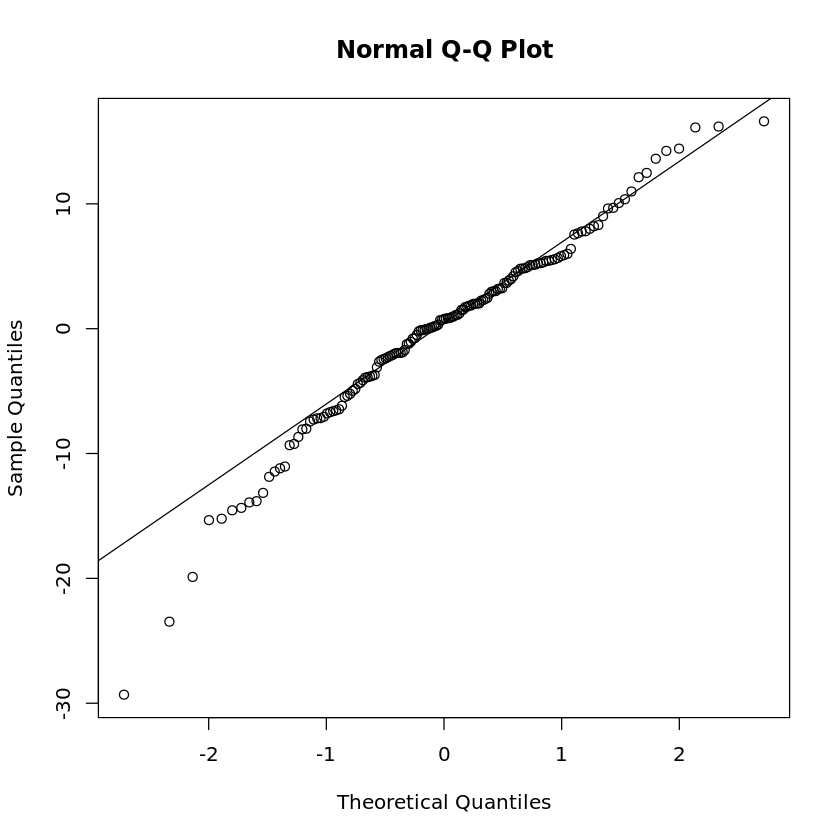

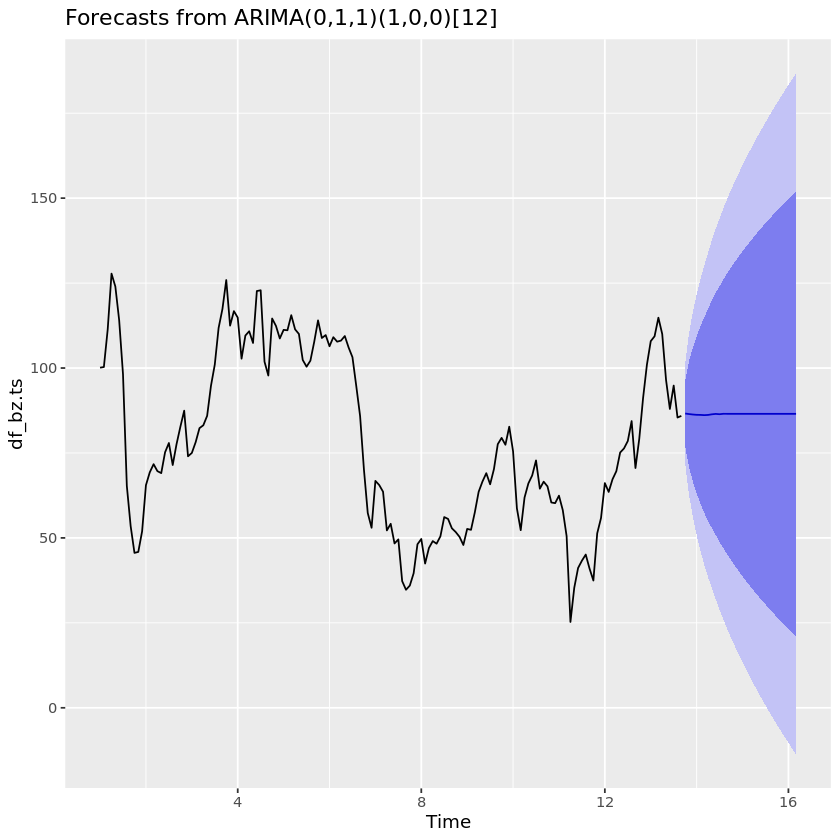


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(1,0,0)[12]
Q* = 13.116, df = 22, p-value = 0.9299

Model df: 2.   Total lags used: 24



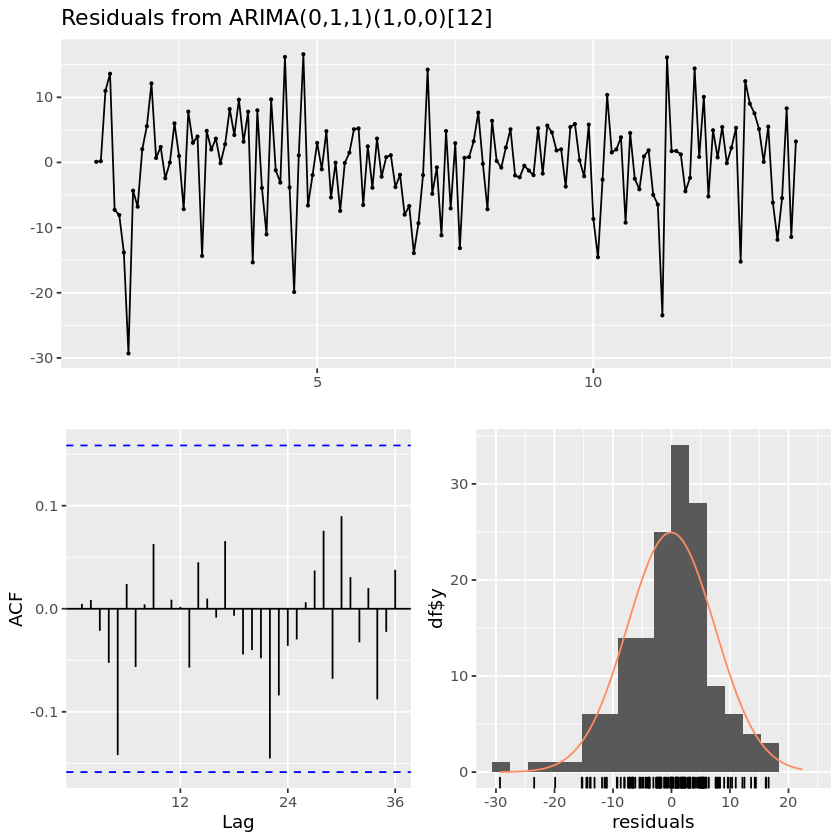

In [218]:
fit = auto.arima(df_bz.ts)
fit

# residual of model
Box.test(fit$residuals, type = "Ljung-Box")
qqnorm(fit$residuals); qqline(fit$residuals)

price_forecast <- forecast(fit, h=30)
autoplot(price_forecast)
checkresiduals(fit)

In [219]:
modelfit <- auto.arima(df_bz.ts, stationary = TRUE, seasonal = TRUE, stepwise = TRUE, trace = TRUE,
                        approximation = FALSE, allowmean = TRUE, lambda = "auto")
modelfit


 ARIMA(2,0,2)(1,0,1)[12] with non-zero mean : Inf
 ARIMA(0,0,0)            with non-zero mean : 1645.78
 ARIMA(1,0,0)(1,0,0)[12] with non-zero mean : 1283.452
 ARIMA(0,0,1)(0,0,1)[12] with non-zero mean : 1457.433
 ARIMA(0,0,0)            with zero mean     : 1963.536
 ARIMA(1,0,0)            with non-zero mean : 1281.394
 ARIMA(1,0,0)(0,0,1)[12] with non-zero mean : 1283.442
 ARIMA(1,0,0)(1,0,1)[12] with non-zero mean : 1285.432
 ARIMA(2,0,0)            with non-zero mean : 1271.188
 ARIMA(2,0,0)(1,0,0)[12] with non-zero mean : 1273.323
 ARIMA(2,0,0)(0,0,1)[12] with non-zero mean : 1273.323
 ARIMA(2,0,0)(1,0,1)[12] with non-zero mean : Inf
 ARIMA(3,0,0)            with non-zero mean : 1273.22
 ARIMA(2,0,1)            with non-zero mean : 1273.18
 ARIMA(1,0,1)            with non-zero mean : 1271.309
 ARIMA(3,0,1)            with non-zero mean : 1275.368
 ARIMA(2,0,0)            with zero mean     : Inf

 Best model: ARIMA(2,0,0)            with non-zero mean 



Series: df_bz.ts 
ARIMA(2,0,0) with non-zero mean 
Box Cox transformation: lambda= 1.162659 

Coefficients:
         ar1      ar2      mean
      1.2158  -0.2771  141.1882
s.e.  0.0771   0.0773   18.4228

sigma^2 = 225.8:  log likelihood = -631.46
AIC=1270.92   AICc=1271.19   BIC=1283.04

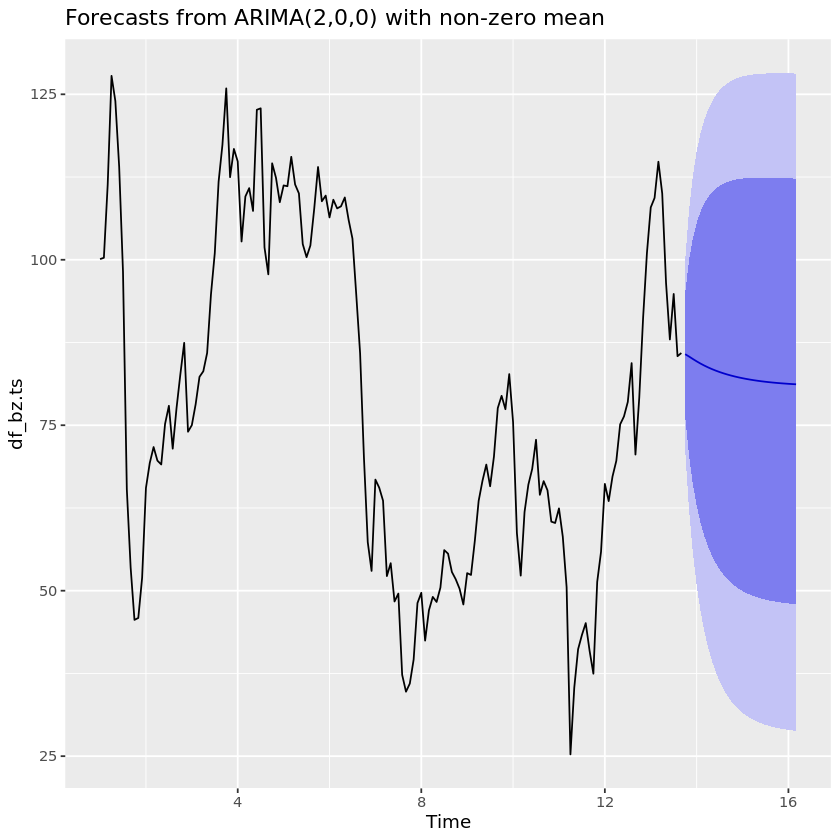


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 11.61, df = 22, p-value = 0.9649

Model df: 2.   Total lags used: 24



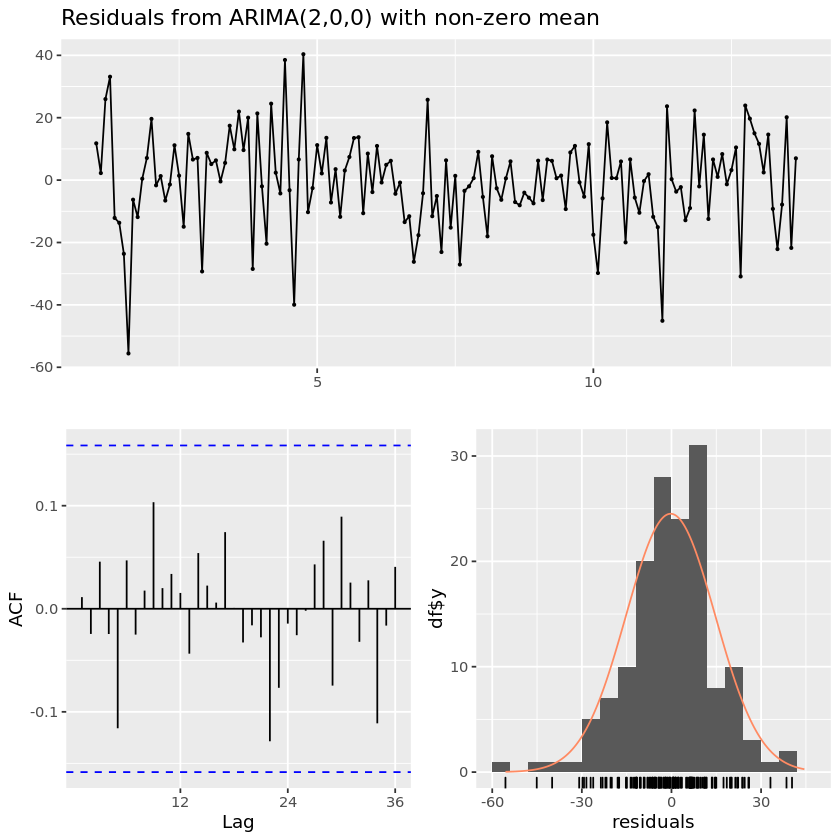

In [220]:
#Now that our model is ready, we will forecast the prices for the next few months
price_forecast <- forecast(modelfit, h=30)
autoplot(price_forecast)
checkresiduals(modelfit)


	Box-Ljung test

data:  modelfit$residuals
X-squared = 0.019864, df = 1, p-value = 0.8879


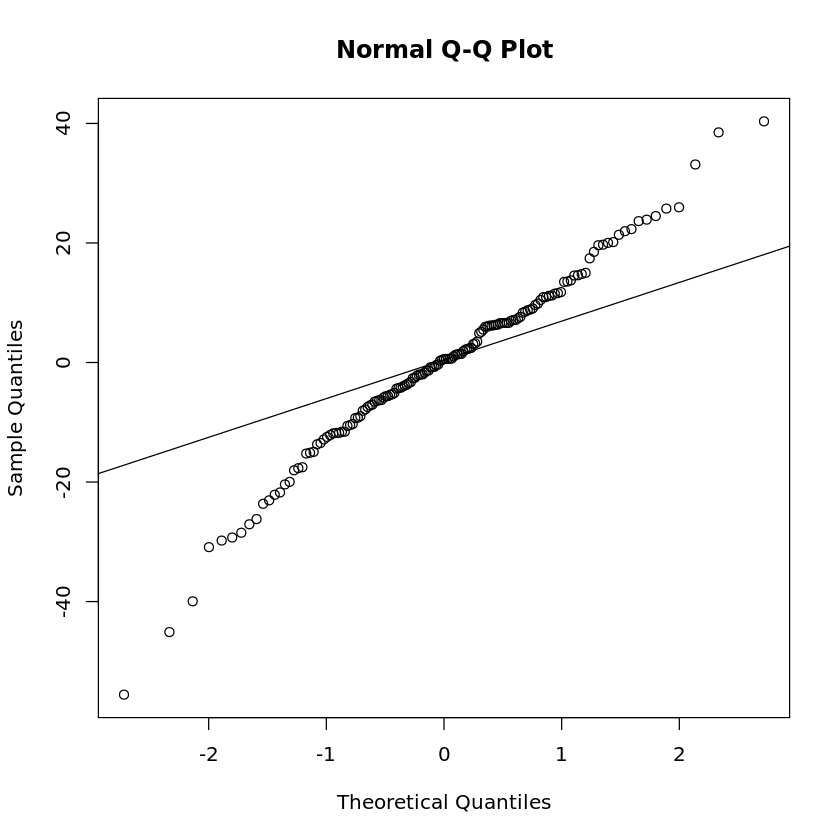

In [221]:
# residual of model
Box.test(modelfit$residuals, type = "Ljung-Box")
qqnorm(modelfit$residuals); qqline(fit$residuals)

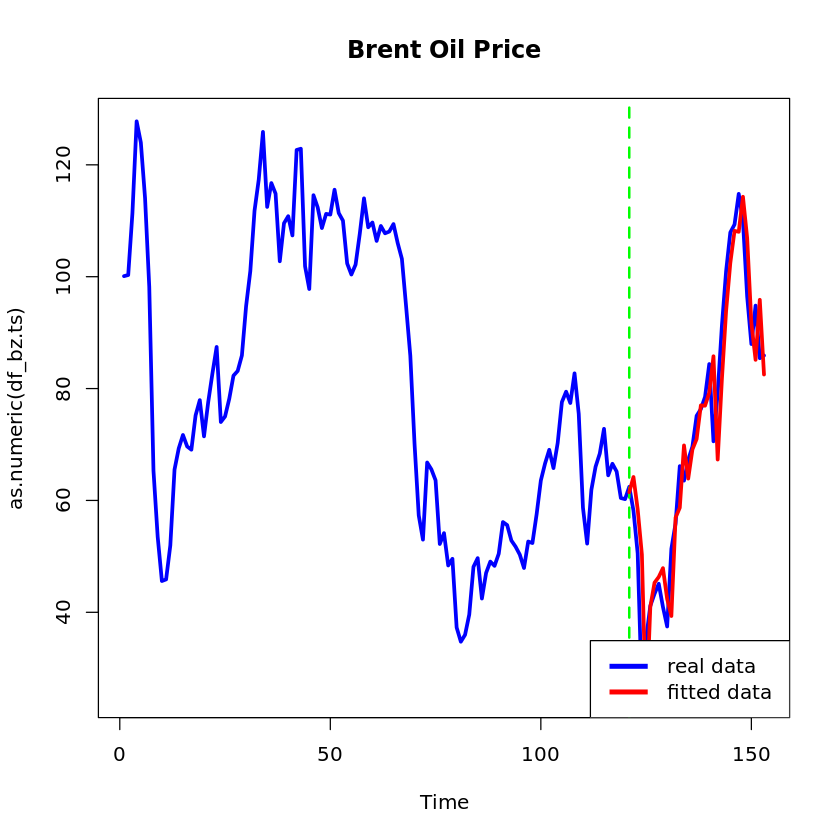

In [222]:
# forecast with modelfit
training = df_bz.ts[1:120]
testing  = df_bz.ts[121:153]
plot.ts(as.numeric(df_bz.ts), main='Brent Oil Price', col='blue', lwd=3)
abline(v=121, col='green', lwd=2, lty=2)
lines(121:153,modelfit$fitted[121:153], lwd=3, col='red')
legend('bottomright', c('real data', 'fitted data'), col=c('blue','red'),lwd=4)

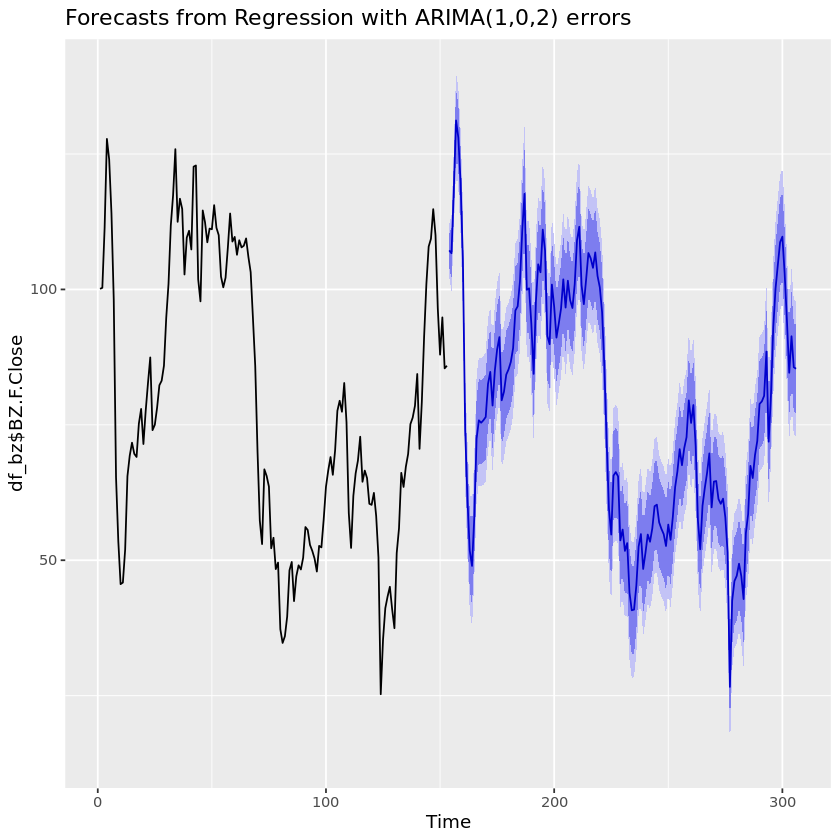


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 11.61, df = 22, p-value = 0.9649

Model df: 2.   Total lags used: 24



[1] 719.725

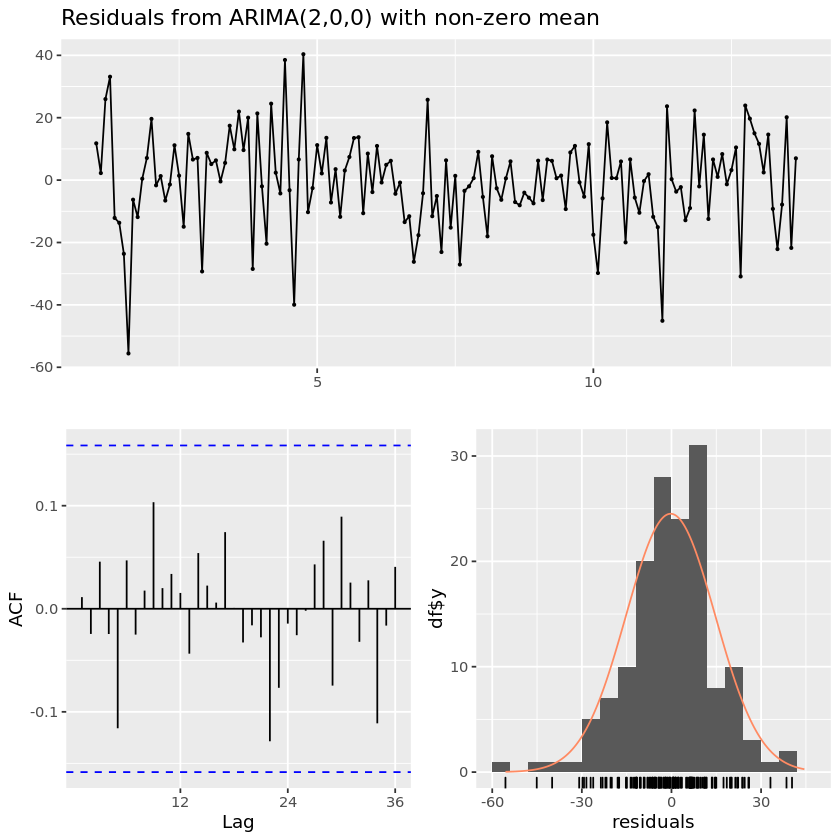

In [238]:
#######armax model applied with different regressors crude oil and gold
auto.arima<- auto.arima(df_bz$BZ.F.Close, xreg=df_cl$CL.F.Close)
price_forecast <- forecast(auto.arima, xreg=df_cl$CL.F.Close, h=20)
autoplot(price_forecast)
checkresiduals(modelfit)
AIC(auto.arima)

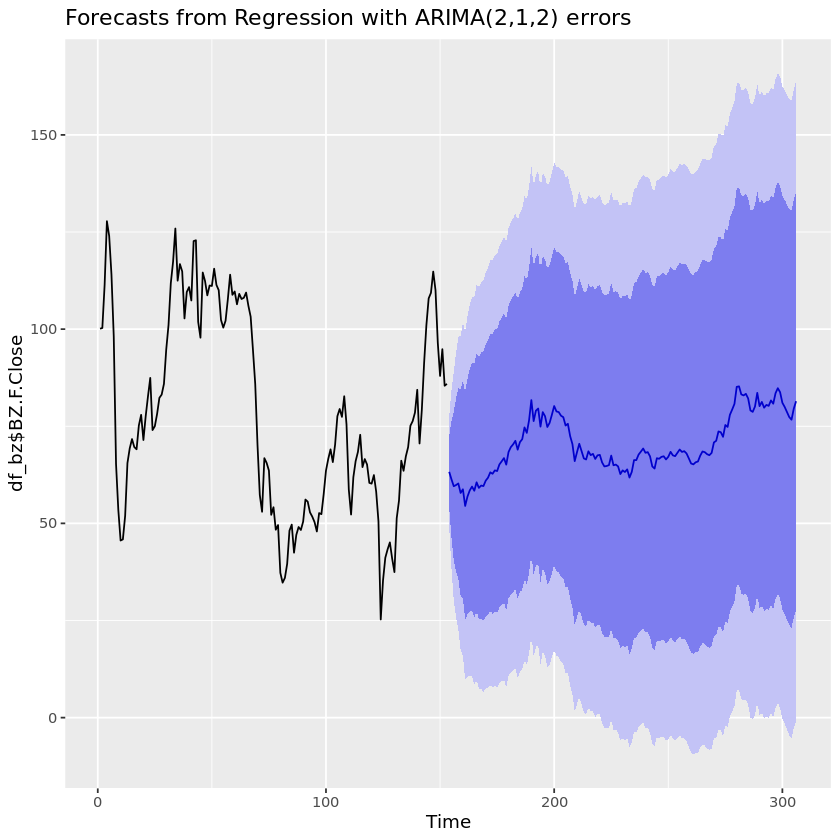


	Ljung-Box test

data:  Residuals from ARIMA(2,0,0) with non-zero mean
Q* = 11.61, df = 22, p-value = 0.9649

Model df: 2.   Total lags used: 24



[1] 1042.077

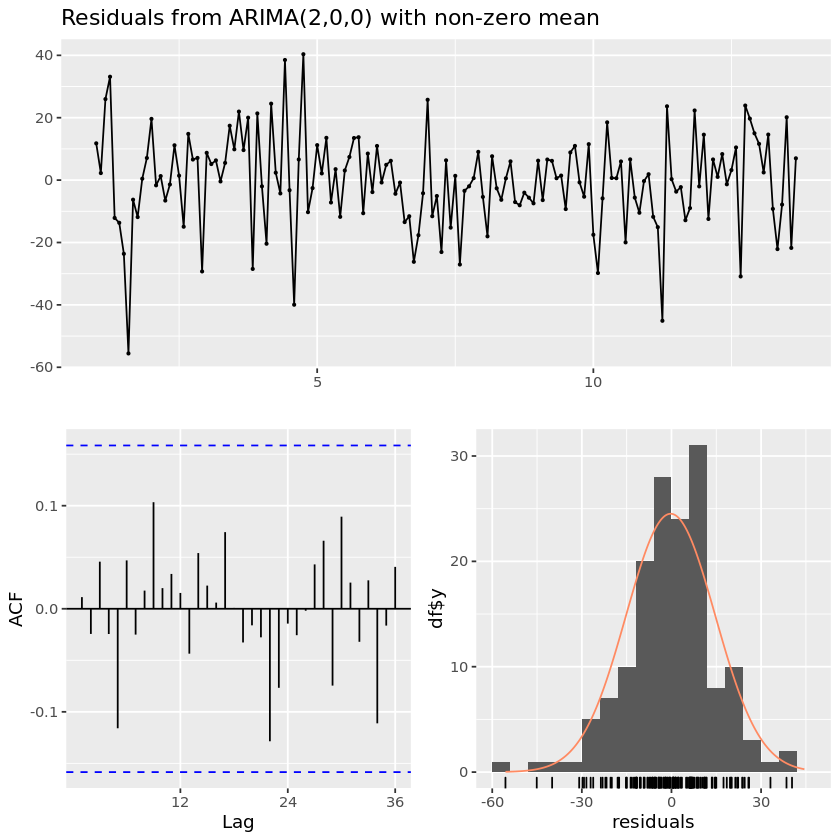

In [239]:
auto.arima<- auto.arima(df_bz$BZ.F.Close, xreg=df_gold$GC.F.Close)
price_forecast <- forecast(auto.arima, xreg=df_gold$GC.F.Close, h=20)
autoplot(price_forecast)
checkresiduals(modelfit)
AIC(auto.arima)



Call:
tslm(formula = df_bz.ts ~ trend + season + df_cl.ts)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9051  -3.2680  -0.6269   2.1163  17.9522 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.92604    2.61325  -1.120   0.2648    
trend        0.02520    0.01128   2.234   0.0271 *  
season2     -0.88314    2.20989  -0.400   0.6900    
season3     -1.22433    2.20994  -0.554   0.5805    
season4     -1.13089    2.20995  -0.512   0.6097    
season5     -3.19317    2.21115  -1.444   0.1510    
season6     -2.94627    2.21181  -1.332   0.1850    
season7     -2.05042    2.21200  -0.927   0.3556    
season8     -2.44973    2.21095  -1.108   0.2698    
season9     -2.33285    2.21181  -1.055   0.2934    
season10    -1.72003    2.25657  -0.762   0.4472    
season11     0.07120    2.25851   0.032   0.9749    
season12     1.13728    2.25832   0.504   0.6153    
df_cl.ts     1.11352    0.02200  50.612   <2e-16 ***
---
Signif. codes:  0 ‘***

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,110.49994,109.35249,122.26510,137.85052,132.17223,122.84578,107.26448,70.33353,55.57672,45.26883,43.83379,55.43668
2,71.23896,74.36741,73.56146,74.24800,72.93470,80.32218,83.87114,76.29255,83.97315,89.17659,93.65434,81.18294
3,81.91930,84.75824,85.57804,87.32241,88.26956,96.63693,98.45994,103.40844,114.40732,123.07381,104.27900,105.68205
4,96.89783,85.33897,100.60111,108.70368,104.96291,114.41040,110.82169,92.08564,90.47949,103.93411,100.98468,95.45051
5,97.31153,99.69393,105.69158,99.75268,103.48362,99.55774,98.81965,103.55659,113.13017,116.68560,105.95267,102.96846
6,107.16787,111.98887,110.54822,108.61798,109.88805,105.10476,103.56494,97.84594,86.16243,70.77691,58.25121,53.74148
7,65.31238,65.20049,63.96028,50.32695,50.60599,46.30152,48.89284,37.88462,34.21846,35.00123,41.92871,51.46046
8,53.03196,44.68003,47.81595,51.87644,48.30270,51.44767,57.13458,57.08338,53.42836,52.65221,53.34398,51.89643
9,55.38318,51.25149,55.87952,62.37863,63.70436,68.77573,66.25600,69.55650,72.03696,80.59210,77.56472,82.49763
10,72.54420,55.67386,49.21123,58.66117,60.44345,63.96702,69.08603,57.12018,62.79645,63.55695,61.49833,61.56516


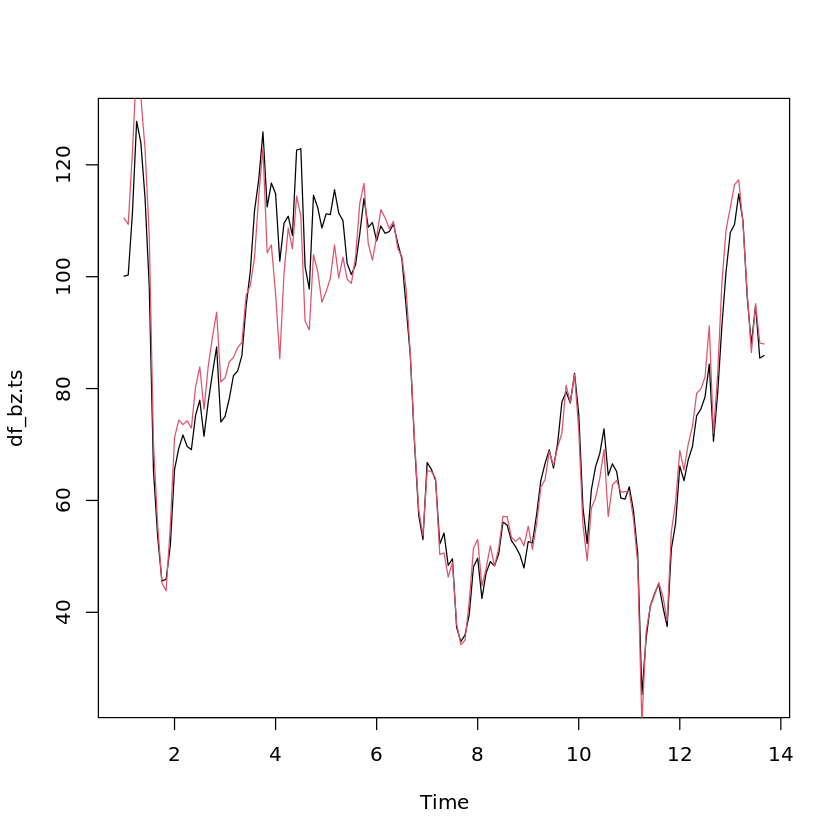

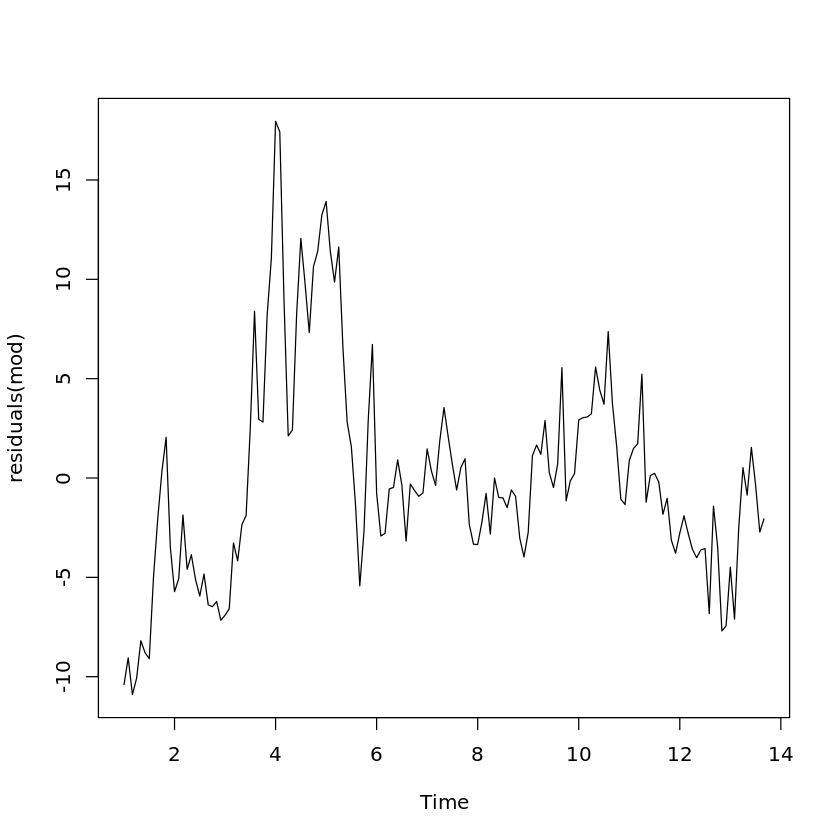

In [242]:
###### we try with a regression model with trend, season and external variable
mod<- tslm(df_bz.ts~ trend+season+df_cl.ts) 
summary(mod)
fitted(mod)
plot(df_bz.ts)
lines(fitted(mod), col=2)
plot(residuals(mod))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,-5.57505119,-9.16489520,-7.87416877,-10.09601861,-8.60904775,-7.47839297,-8.17425444,-8.08585659,-4.28218201,-2.43749988,-0.03966017,1.39915418
2,-3.78094846,-4.32814115,-4.27357614,-1.46199488,-4.80479704,-2.87073555,-4.95622123,-5.01907690,-4.21392199,-5.95530670,-5.50730797,-5.60380287
3,-6.46640699,-6.02173595,-5.94638957,-2.77418339,-4.40260886,-1.79027504,-2.13873493,2.52940521,6.95844201,1.37549311,3.42955148,7.39139457
4,9.29567740,16.00925231,14.25058388,7.70603173,2.77834960,3.31232671,7.80207788,10.19955698,8.07856990,6.74618538,10.02282181,9.70220071
5,11.97147382,12.08958177,10.02162144,9.14055578,10.75680618,5.31760268,3.31826768,1.86928252,-1.05219703,-4.47881524,-1.50269211,2.44683775
6,5.43086582,-1.79230538,-1.47319286,-2.37406123,-0.16860886,-0.81356123,0.96444800,-0.73916794,-2.72879250,0.30282917,-1.09321116,-0.64987096
7,-0.72520965,1.44561635,-0.15078944,-0.12993128,1.84206922,2.90269351,1.51916426,0.74400871,-0.43400738,0.78261584,0.70186168,-2.28165800
8,-2.47928937,-2.88806827,-1.82968562,-0.80256970,-2.86201910,0.50888235,-1.52159442,-0.60170613,-1.50249603,-0.33439411,-1.04607280,-2.73201118
9,-3.28554537,-2.22894622,1.04942671,0.87066206,0.97930183,2.65615991,-0.22291896,0.03095654,0.72885060,5.12415341,-2.25626886,1.20188166
10,-0.25584763,2.99171883,2.14173823,2.83186602,2.78167971,5.13477953,3.45594695,3.54721222,6.83157018,2.55041046,2.05363147,-0.90852963


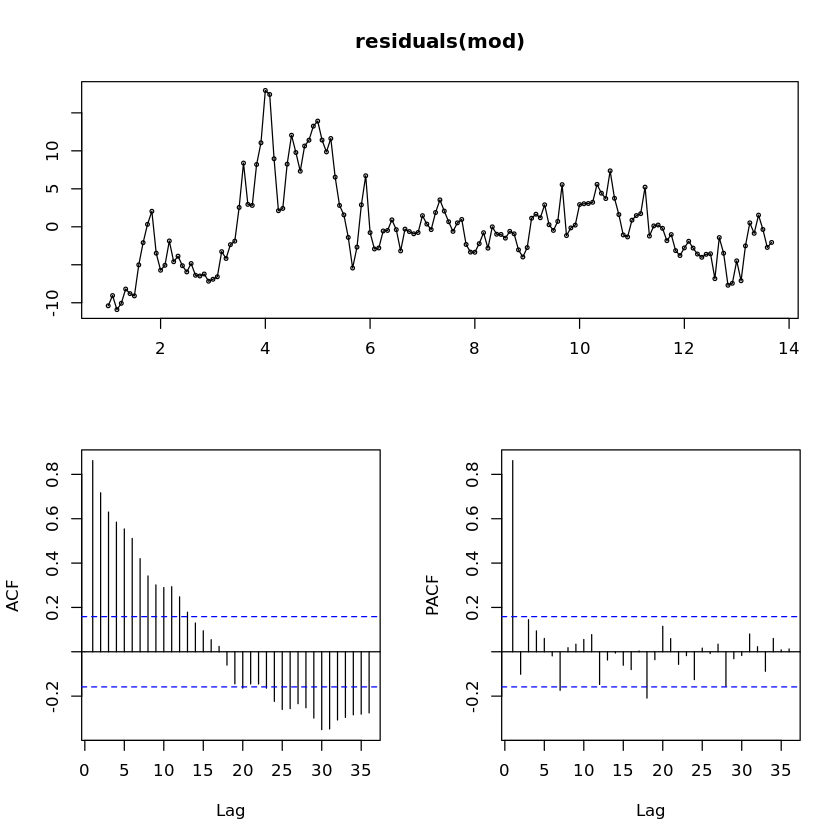

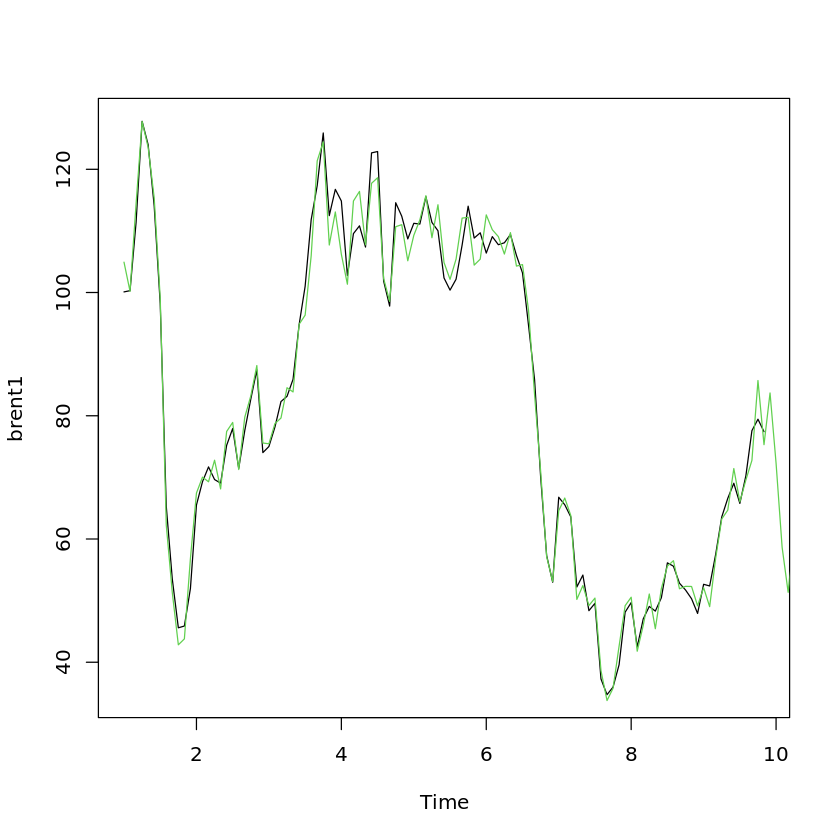

In [243]:
#####analysis of residuals: autocorrelation? 
dw<- dwtest(mod, alt="two.sided")
tsdisplay(residuals(mod))

#####fit an arima model to residuals
aar<- auto.arima(residuals(mod))
fitted(aar)

#######complete the analysis by summing predictions made with linear model and arma on residuals
plot(brent1)
lines(fitted(mod)+fitted(aar), col=3)

######Notice the difference between the two methods: ARMAX and linear regression+ arima on residuals

In [ ]:
## now we model the volatility
##
##ARIMA-type models are unable to explain a number of important features common to most financial time series. 
##In a separate post, I discussed all the stylized facts of financial returns.
#There are many distinct kinds of non-linear time series models. The ARCH or GARCH models,
## which are used to model and predict volatility, are the most widely used non-linear financial models.
## garch modelling

## day-day trading data
d_co <- getSymbols("BZ=F", verbose = TRUE, src = "yahoo", 
             from=start_date,to=end_date, periodicity="daily", auto.assign=FALSE)
df_d_co = data.frame(date = index(d_co), d_co, row.names=NULL)
df_d_co<- na.omit(df_d_co)
df_d_co.ts <- ts(df_d_co$BZ.F.Close)
df_d_co.ts
## daily return

daily_ret <- (df_d_co$BZ.F.Open-df_d_co$BZ.F.Close)/df_d_co$BZ.F.Close

daily_ret <- data.frame(df_d_co$date, daily_ret)
colnames(daily_ret) <- c("date", "return")
rownames(daily_ret) <- 1:nrow(daily_ret)

In [256]:
daily_ret.ts <- ts(daily_ret, frequency=1)

In [272]:
#apply ADF test with drift
adf.test(daily_ret.ts[,2])
#summary of he test
summary(daily_ret.ts[,2])

Warning message in adf.test(daily_ret.ts[, 2]):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  daily_ret.ts[, 2]
Dickey-Fuller = -13.869, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.1439546 -0.0096534  0.0000000  0.0003875  0.0090409  0.3429901 

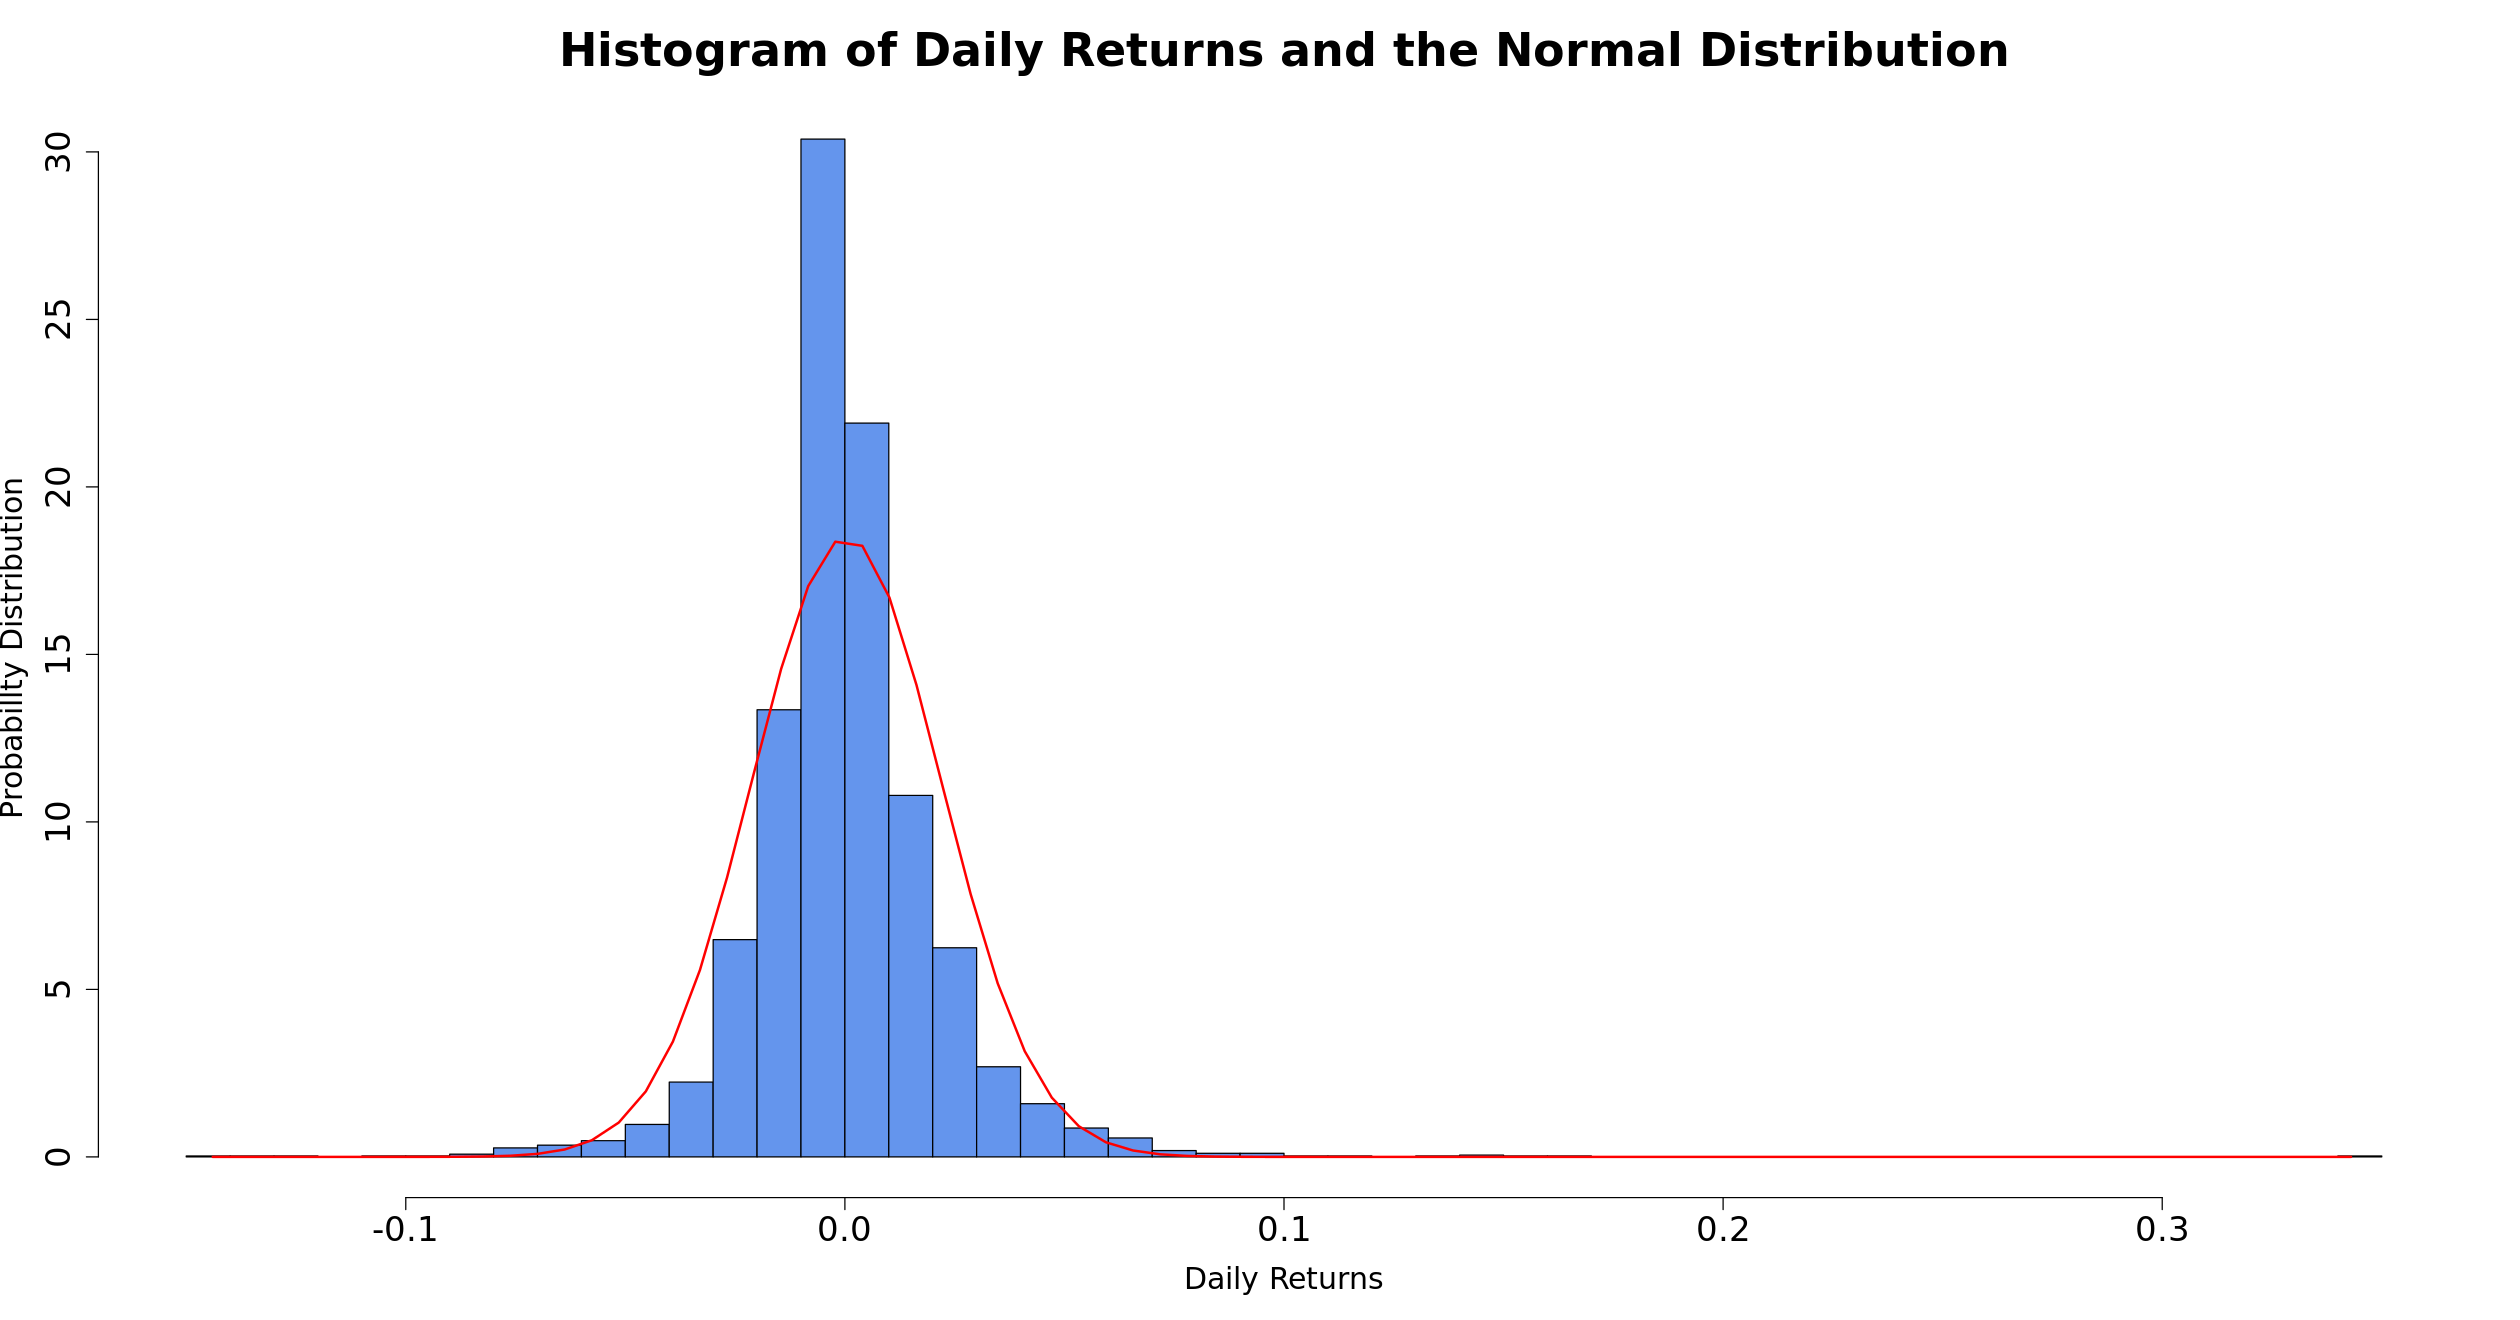

In [274]:
#histogram with normal density curve
options(repr.plot.width=21, repr.plot.height=11)#to set the figure size
hist(daily_ret.ts[,2],prob=T,breaks=50,xlab="Daily Returns",main = "Histogram of Daily Returns and the Normal Distribution",
ylab="Probabillty Distribution",col="cornflowerblue", cex.lab=1.5, cex.axis=1.7,cex.main=2.3) 
mu<-mean(daily_ret.ts[,2])  
sigma<-sd(daily_ret.ts[,2])
x<-seq(min(daily_ret.ts[,2]),max(daily_ret.ts[,2]),length=80) 
y<-dnorm(x,mu,sigma) 
lines(x,y,lwd=2,col="red")  

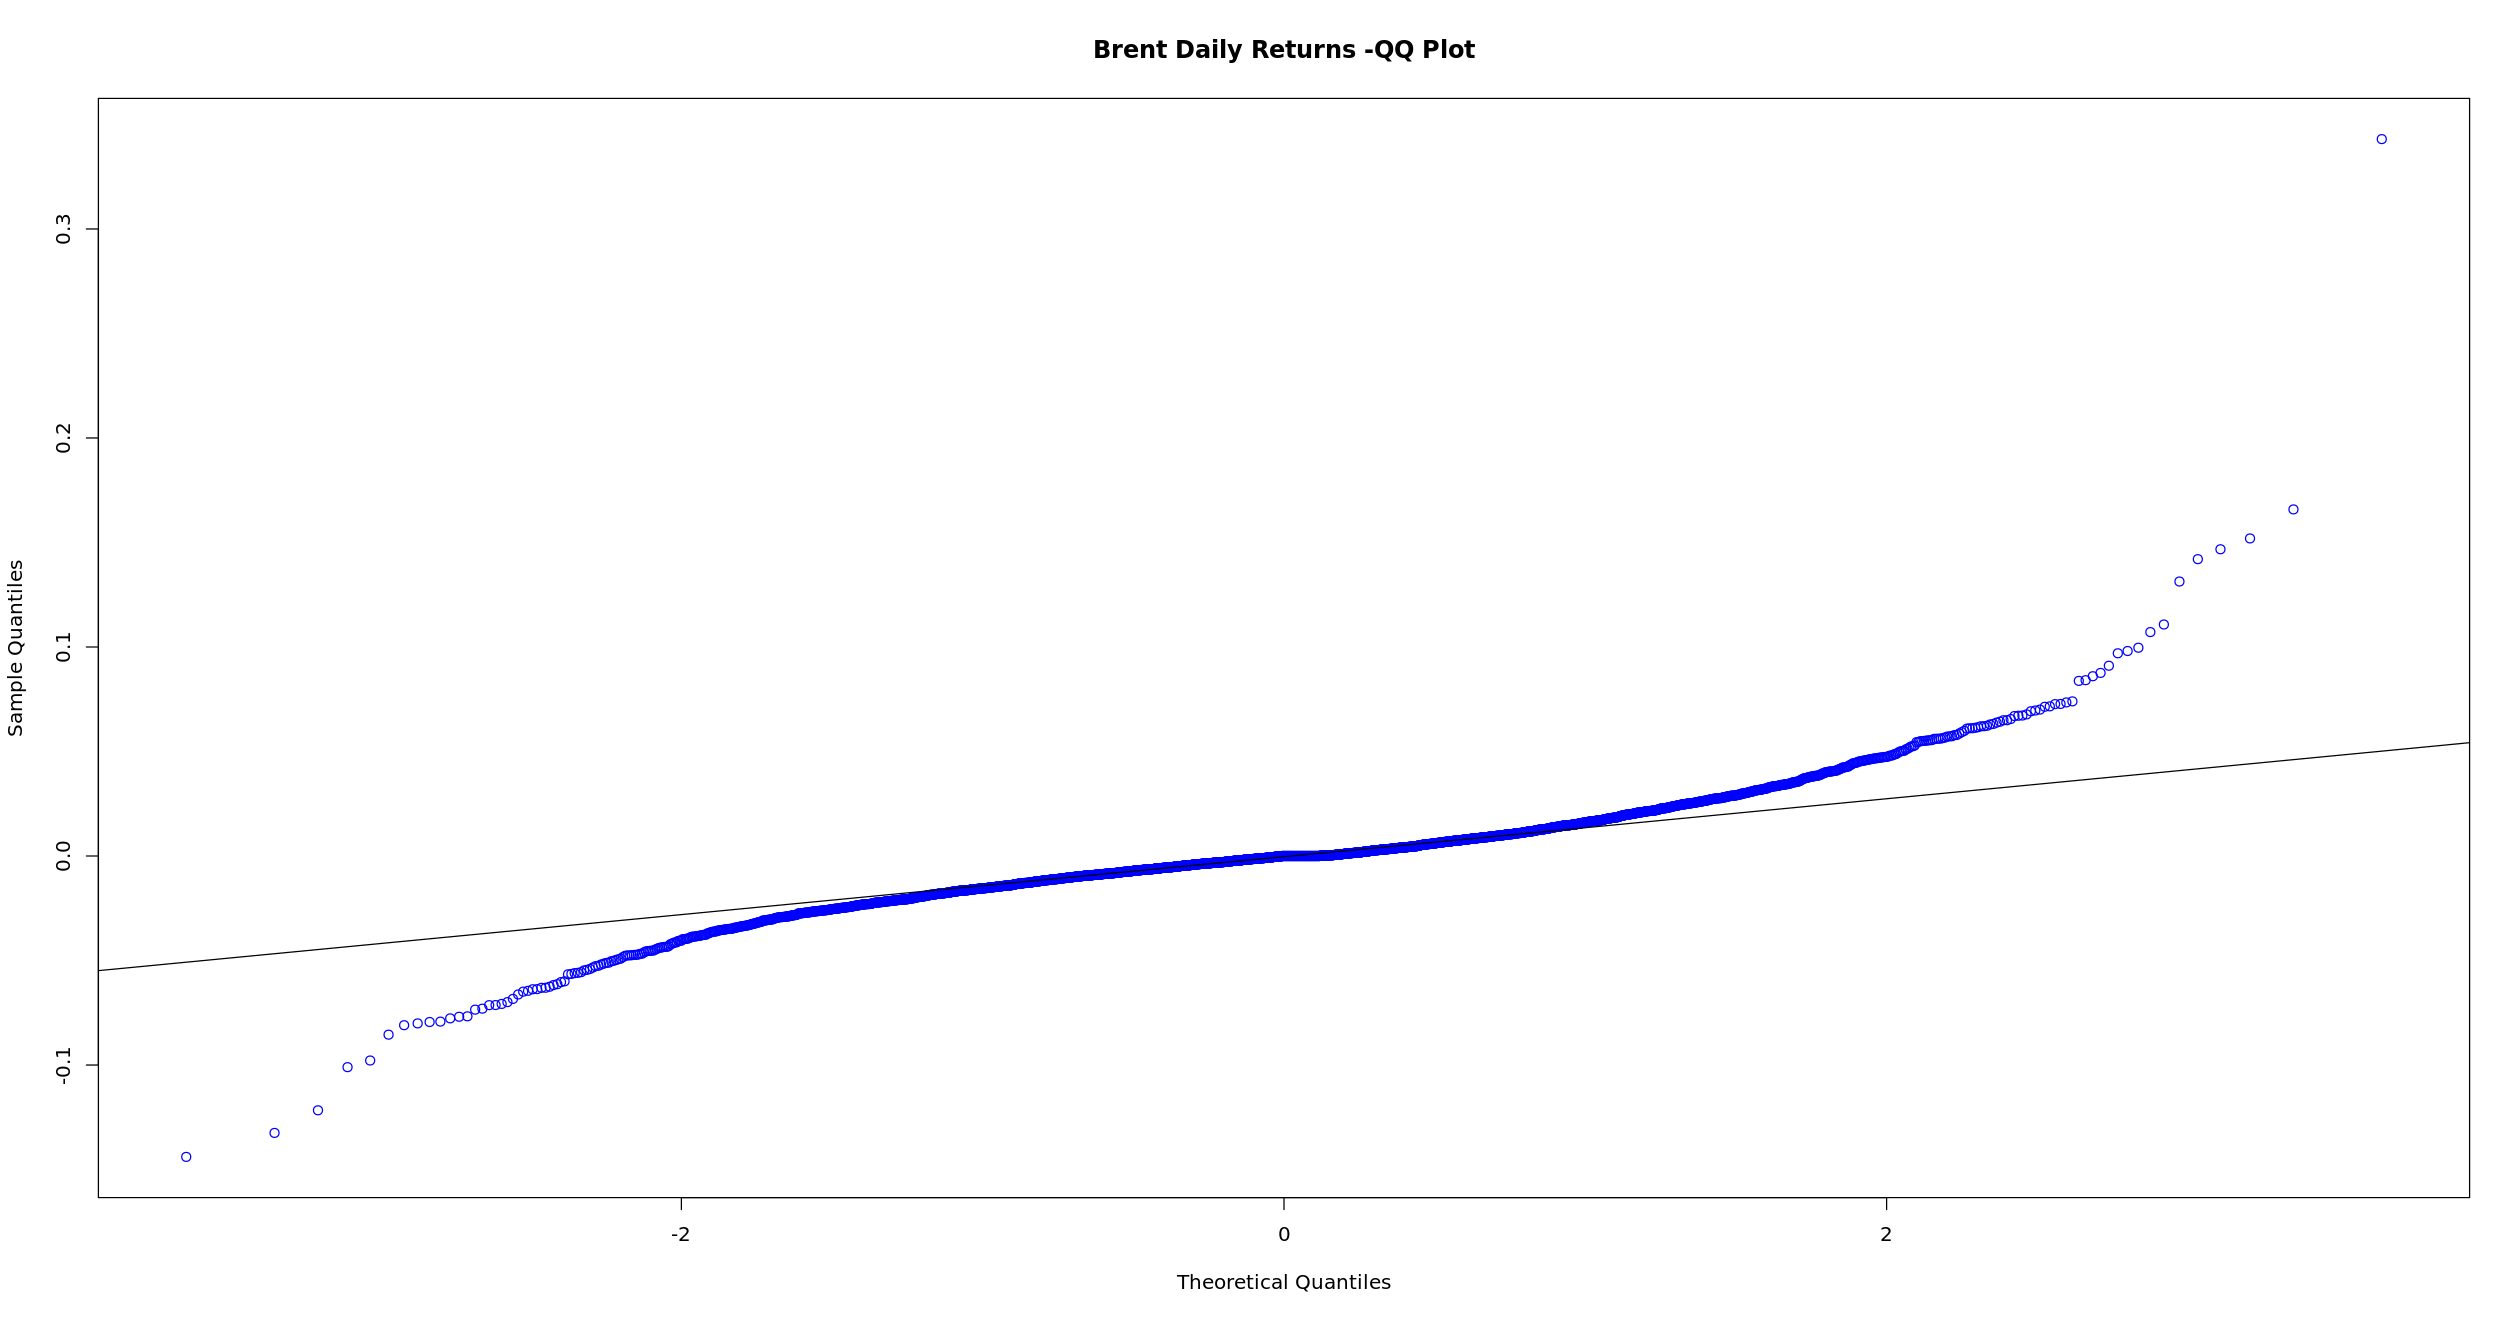

In [275]:
##QQ-plot
qqnorm(daily_ret.ts[,2], main = "Brent Daily Returns -QQ Plot", col = "blue")
qqline(daily_ret.ts[,2])

In [278]:
#conduct Jarque-Bera test for normality
jarque.bera.test(daily_ret.ts[,2])

#In this case, we would reject the null hypothesis that the data is not normally distributed.


	Jarque Bera Test

data:  daily_ret.ts[, 2]
X-squared = 82201, df = 2, p-value < 2.2e-16



	Box-Ljung test

data:  coredata(daily_ret.ts[, 2]^2)
X-squared = 628.8, df = 12, p-value < 2.2e-16


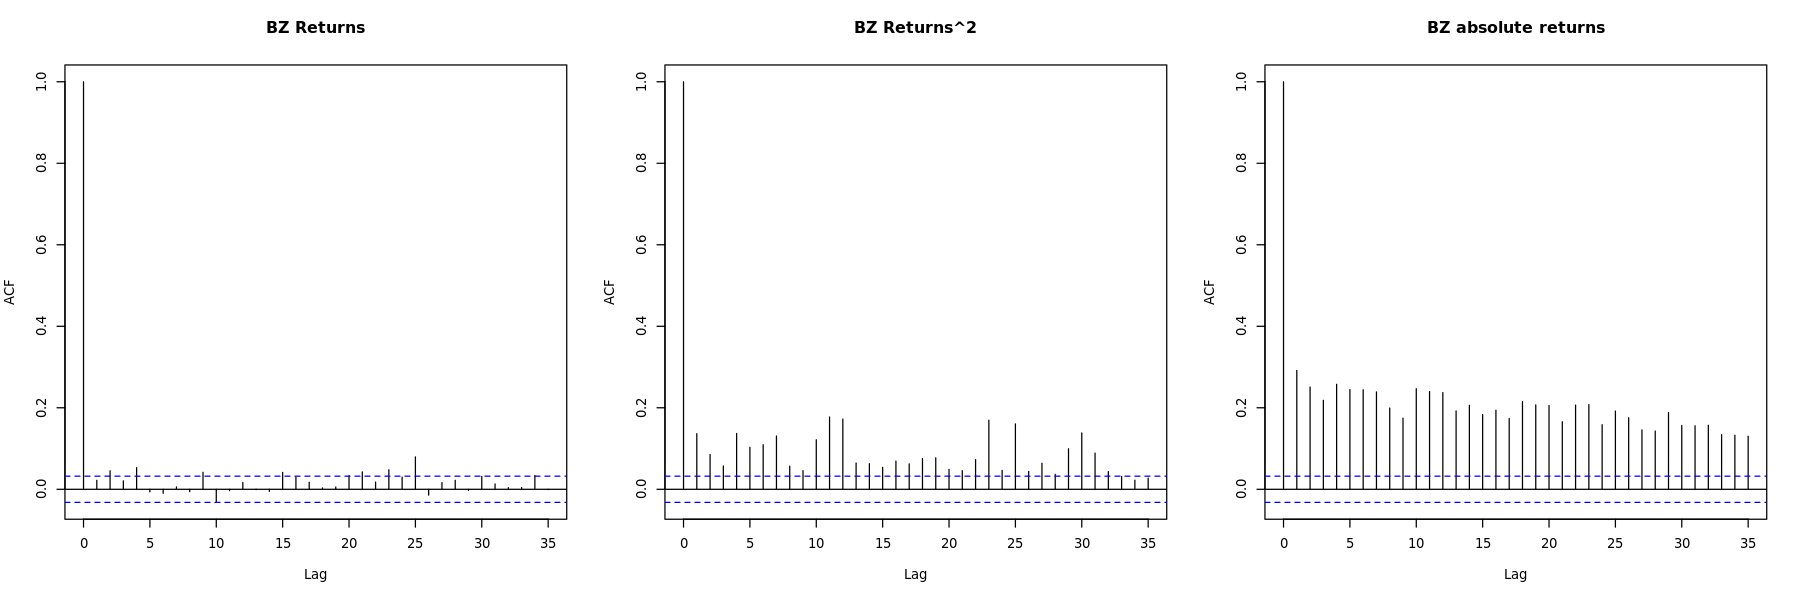

In [287]:
# plot autocorrelations of returns, returns^2 and abs(returns)
options(repr.plot.width=15, repr.plot.height=5)
par(mfrow=c(1,3))
 acf(daily_ret.ts[,2], main="BZ Returns",cex.main=10)
 acf(daily_ret.ts[,2]^2, main="BZ Returns^2",cex.main=10)
 acf(abs(daily_ret.ts[,2]), main="BZ absolute returns",cex.main=10)
par(mfrow=c(1,1))
# use Ljung Box.test from stats package to check auto correlation in squre retruns
Box.test(coredata(daily_ret.ts[,2]^2), type="Ljung-Box", lag = 12)

ARCH heteroscedasticity test for residuals 
alternative: heteroscedastic 

Portmanteau-Q test: 
     order   PQ p.value
[1,]     4 2.72   0.606
[2,]     8 3.24   0.919
[3,]    12 3.78   0.987
[4,]    16 5.07   0.995
[5,]    20 5.97   0.999
[6,]    24 7.72   0.999
Lagrange-Multiplier test: 
     order    LM  p.value
[1,]     4 85.43 0.00e+00
[2,]     8 40.44 1.04e-06
[3,]    12 17.55 9.26e-02
[4,]    16 11.19 7.39e-01
[5,]    20  7.88 9.88e-01
[6,]    24  5.70 1.00e+00


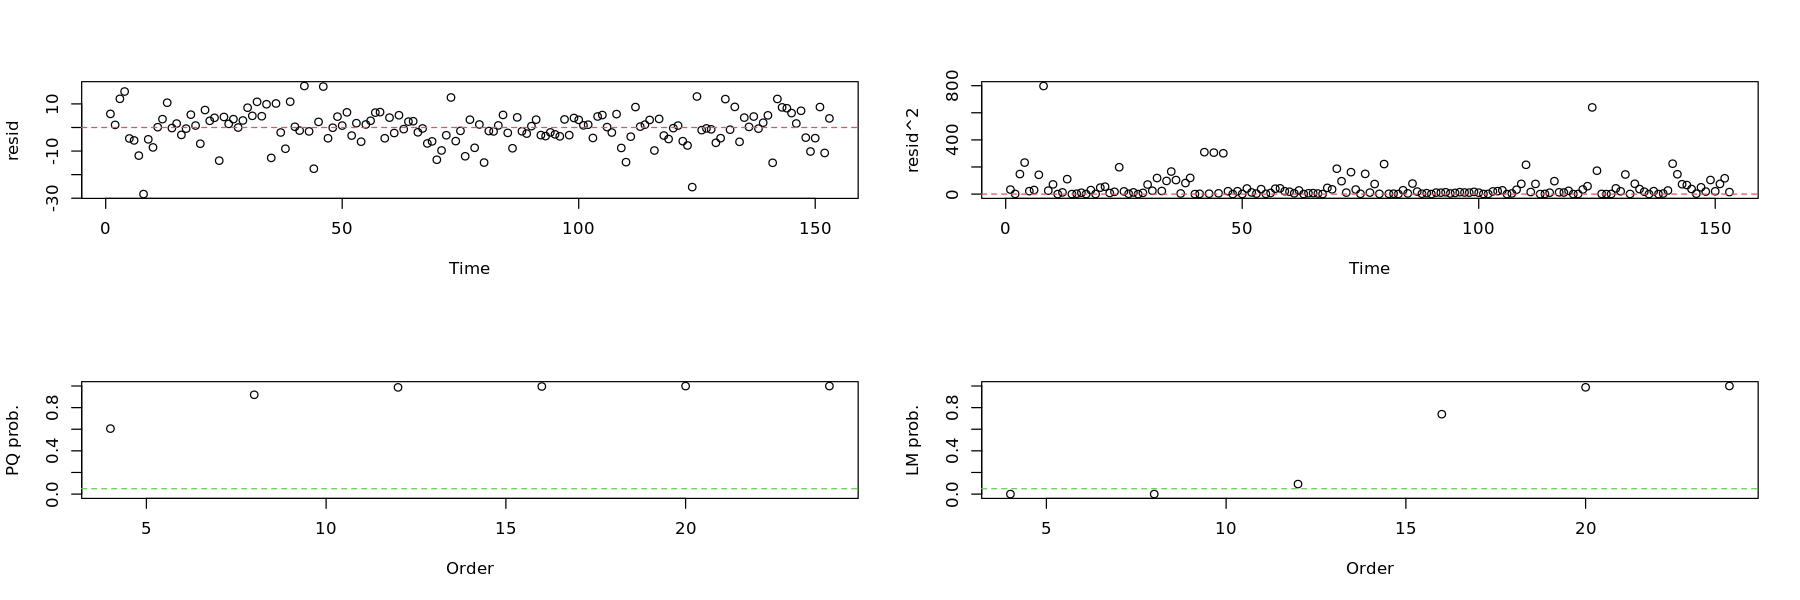

In [290]:
#ARCH LM Test
arch.test(f2)

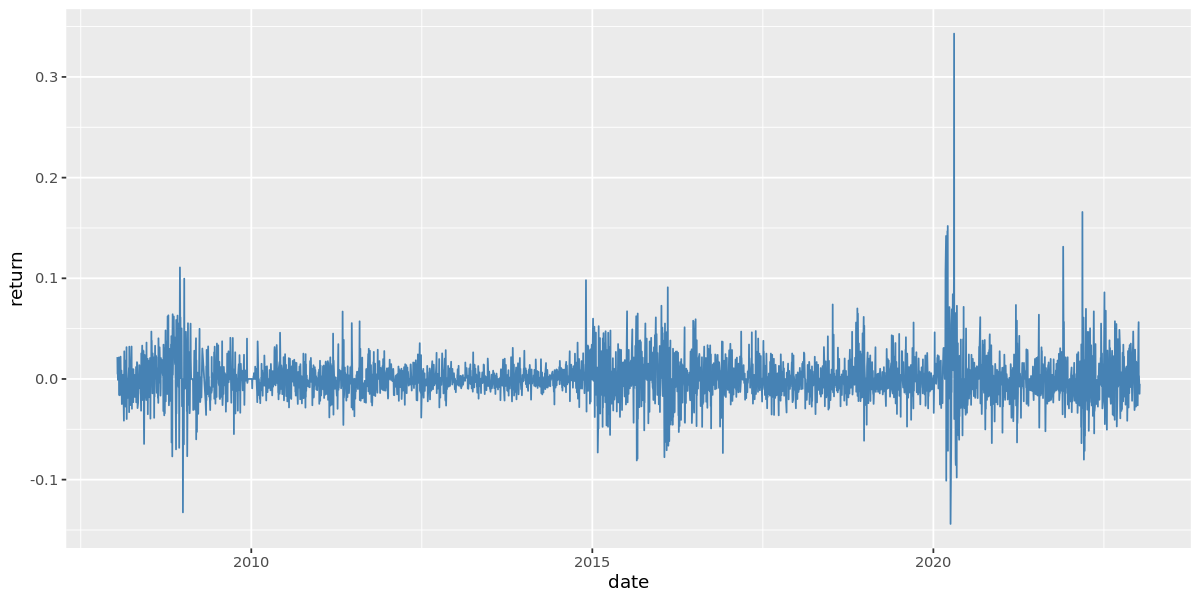

In [292]:
p1 <- ggplot(daily_ret, aes(x=date, y=return))
p1 + geom_line(colour="steelblue")

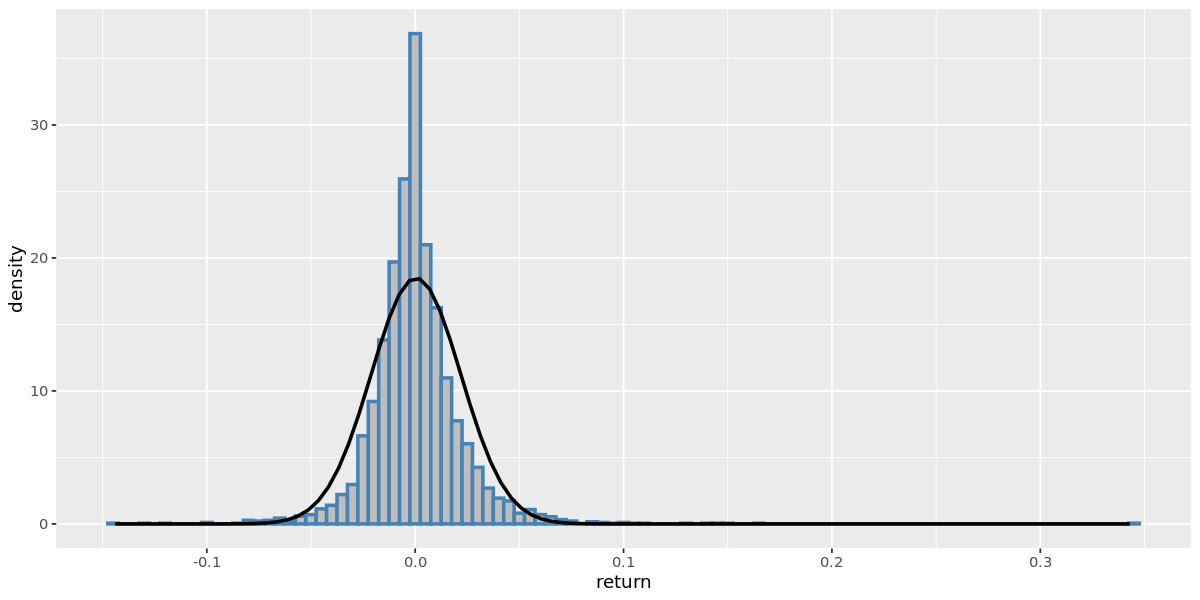

In [293]:
p2 <- ggplot(daily_ret) 

p2 + geom_histogram(aes(x=return, y=..density..), binwidth = 0.005, color="steelblue", fill="grey", size=1) +
  stat_function(fun = dnorm, args = list(mean = mean(daily_ret$return, na.rm = T), sd = sd(daily_ret$return, na.rm = T)), size=1)


In [ ]:
# 1. Skewness
# As we can see from the plot the return is not symmetrically distributed, 
#rather it is positive skewed (or right skewed). A positive skewness indicating on average it gives us a positive return. 
#But the level of skewness is not very high. p.s. If the distribution is highly right skewed we can use a log transformation to convert
# it into normal in avioding any misleading results.
# 2. Kurtosis
# The plot show us positive Kurtosis comparing with normal distribution. 
#Kurtosis can be used as a measure of risk. A large Kurtosis is associated with a high level of risk because it 
#indicates that there are high probabilities of extremely large and small returns (Heavy-tailed). 
#Meanwhile, a small kurtosis shows a moderate level of risk for the probabilities of extreme returns are relatively low.

In [294]:
daily_ret_xts <- xts(daily_ret[,-1], order.by=daily_ret[,1])
realizedvol <- rollapply(daily_ret_xts, width = 20, FUN=sd.annualized)
vol <- data.frame(index(realizedvol), realizedvol)
colnames(vol) <- c("date", "volatility")

Warning message:
“Removed 19 row(s) containing missing values (geom_path).”


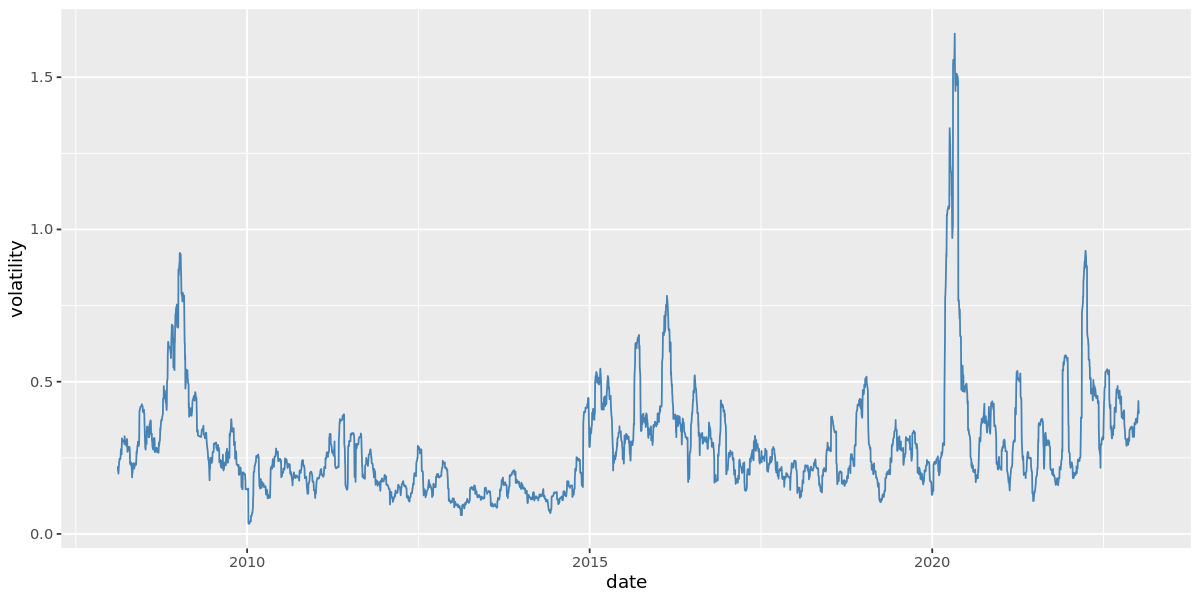

In [295]:
p3 <- ggplot(vol, aes(x=date, y=volatility))
p3 +
  geom_line( color="steelblue")

In [ ]:
##ARCH-GARCH with normal innovation

In [296]:
#ARCH Model estimation with normal innovation
spec = ugarchspec(variance.model=list(garchOrder=c(1,0)),
mean.model=list(armaOrder=c(0,0)),distribution.model="norm")
#Fit ARCH Model
arch11.fit=ugarchfit(data=daily_ret_xts,spec=spec)
#fitted model outcome
arch11.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,0)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu     -0.000081    0.000291 -0.27735  0.78151
omega   0.000275    0.000009 31.42933  0.00000
alpha1  0.441673    0.034976 12.62783  0.00000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu     -0.000081    0.000333 -0.24277  0.80819
omega   0.000275    0.000025 10.78945  0.00000
alpha1  0.441673    0.083278  5.30357  0.00000

LogLikelihood : 9331.399 

Information Criteria
------------------------------------
                    
Akaike       -5.0207
Bayes        -5.0156
Shibata      -5.0207
Hannan-Quinn -5.0189

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
           

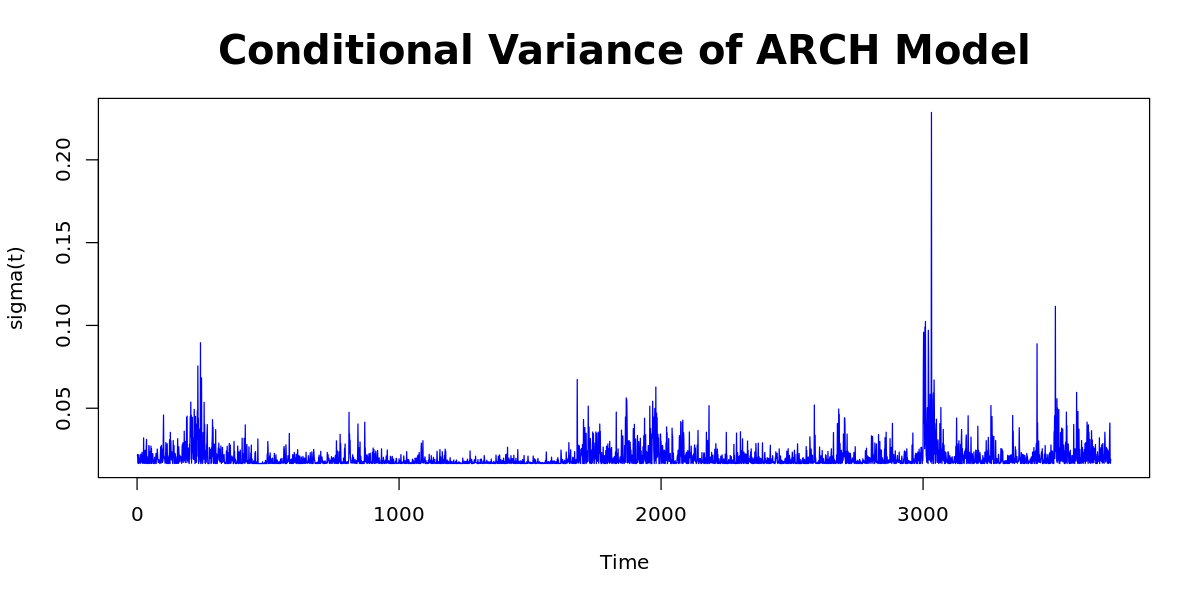

In [299]:
#Conditional Volayility Plot
options(repr.plot.width=10, repr.plot.height=5)
plot.ts(sigma(arch11.fit), ylab="sigma(t)", col="blue", main = "Conditional Variance of ARCH Model", cex.main=2)

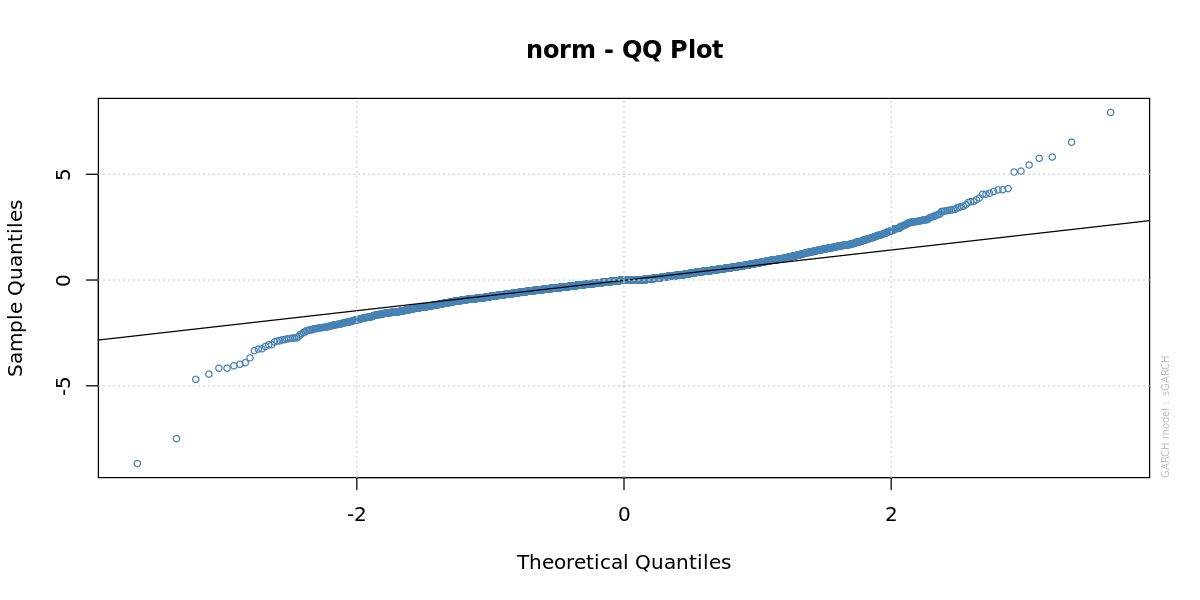

In [307]:
##QQ-plot for fitted ARCH Model normal innov
plot(arch11.fit, which=9)

In [300]:
#Specify GARCH with normal innovation:
spec = ugarchspec(variance.model=list(garchOrder=c(1,1)),
mean.model=list(armaOrder=c(0,0)),
distribution.model="norm",)
#fit GARCH model
garch.fit=ugarchfit(data=daily_ret_xts,spec=spec)
##summary of GARCH fit
garch.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu     -0.000262    0.000241  -1.0841 0.278314
omega   0.000004    0.000002   2.3561 0.018468
alpha1  0.102421    0.010456   9.7954 0.000000
beta1   0.894722    0.010638  84.1053 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu     -0.000262    0.000281 -0.93186 0.351408
omega   0.000004    0.000006  0.66117 0.508505
alpha1  0.102421    0.025542  4.00991 0.000061
beta1   0.894722    0.029820 30.00405 0.000000

LogLikelihood : 9774.544 

Information Criteria
------------------------------------
                    
Akaike       -5.2586
Bayes        -5.2519
Shibata      -5.2586
Hannan-Quinn -5.2563

Weig

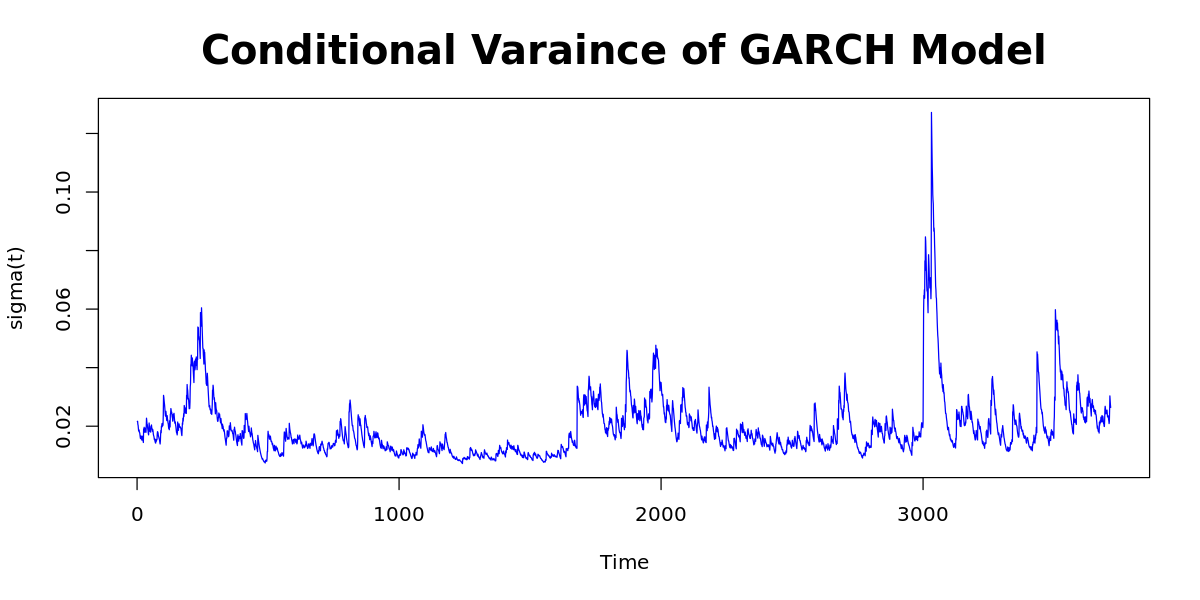

In [301]:
#Conditional Volatility Plot for GARCH Model
options(repr.plot.width=10, repr.plot.height=5)
plot.ts(sigma(garch.fit), ylab="sigma(t)", col="blue", main = "Conditional Varaince of GARCH Model", cex.main=2)

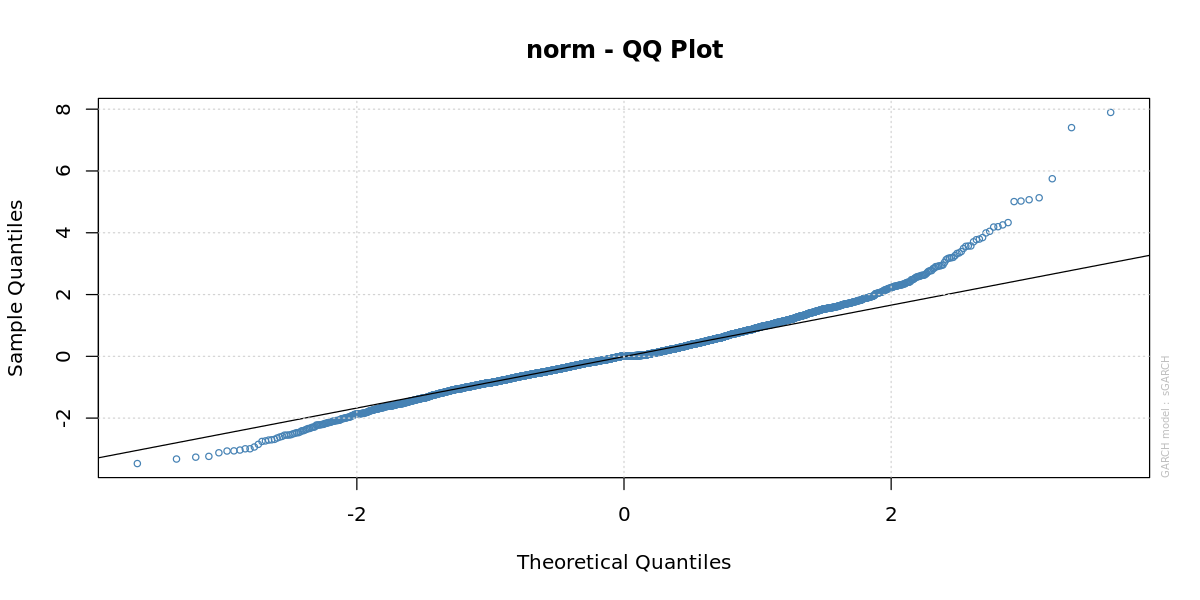

In [302]:
##QQ-plot for fitted GARCH Model
plot(garch.fit, which=9)

In [ ]:
##Estimation of ARCH and GARCH Models with Non-Normal Innovations

In [303]:
#ARCH Model with t-distribution innovation
spec = ugarchspec(variance.model=list(garchOrder=c(1,0)),
mean.model=list(armaOrder=c(0,0)),distribution.model="std")
#Fit ARCH Model
arch11.fit.t=ugarchfit(data=daily_ret_xts,spec=spec)
arch11.fit.t



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,0)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu     -0.000776    0.000235  -3.3052 0.000949
omega   0.000302    0.000026  11.6349 0.000000
alpha1  0.587662    0.076918   7.6401 0.000000
shape   3.161050    0.194429  16.2582 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu     -0.000776    0.000265  -2.9272  0.00342
omega   0.000302    0.000034   8.9313  0.00000
alpha1  0.587662    0.106269   5.5299  0.00000
shape   3.161050    0.250608  12.6135  0.00000

LogLikelihood : 9684.369 

Information Criteria
------------------------------------
                    
Akaike       -5.2101
Bayes        -5.2034
Shibata      -5.2101
Hannan-Quinn -5.2077

Weigh

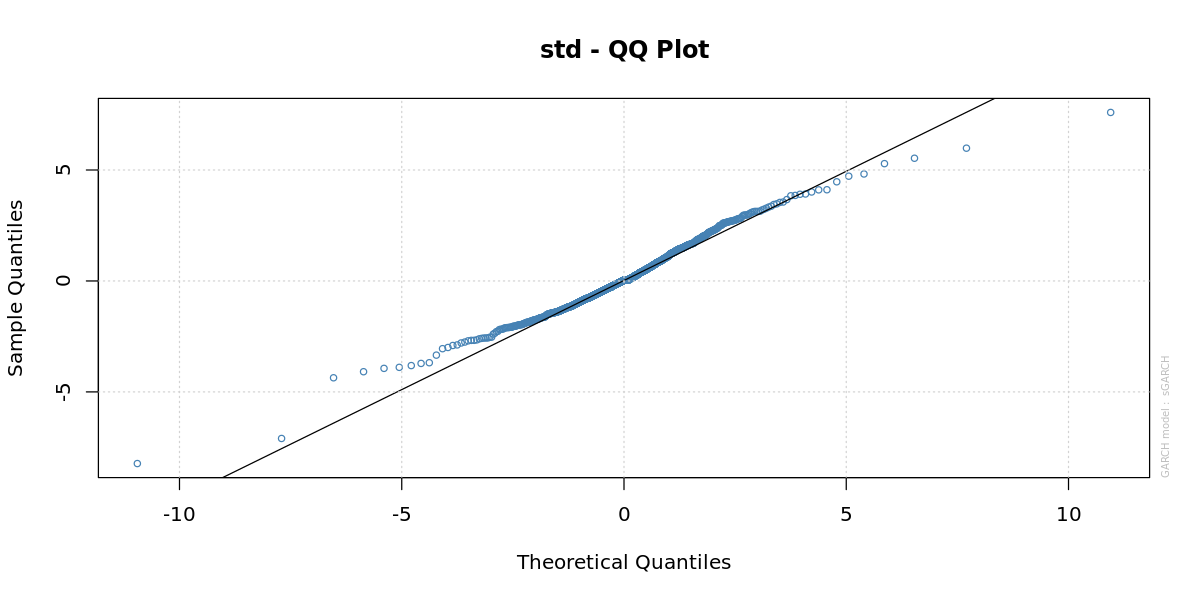

In [305]:
##QQ-plot for fitted ARCH Model with t distribution
plot(arch11.fit.t, which=9)

In [304]:
#Specify GARCH models:
spec = ugarchspec(variance.model=list(garchOrder=c(1,1)),
mean.model=list(armaOrder=c(0,0)),
distribution.model="std",)
#fit GARCH model
garch.fit.t=ugarchfit(data=daily_ret_xts,spec=spec)
garch.fit.t


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu     -0.000615    0.000220  -2.8002 0.005108
omega   0.000003    0.000002   1.4432 0.148967
alpha1  0.096516    0.016459   5.8641 0.000000
beta1   0.902484    0.015785  57.1735 0.000000
shape   5.108601    0.450824  11.3317 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu     -0.000615    0.000248 -2.48551 0.012937
omega   0.000003    0.000007  0.47276 0.636381
alpha1  0.096516    0.039700  2.43115 0.015051
beta1   0.902484    0.040977 22.02437 0.000000
shape   5.108601    0.575445  8.87765 0.000000

LogLikelihood : 9927.217 

Information Criteria
------------------------------------
                 

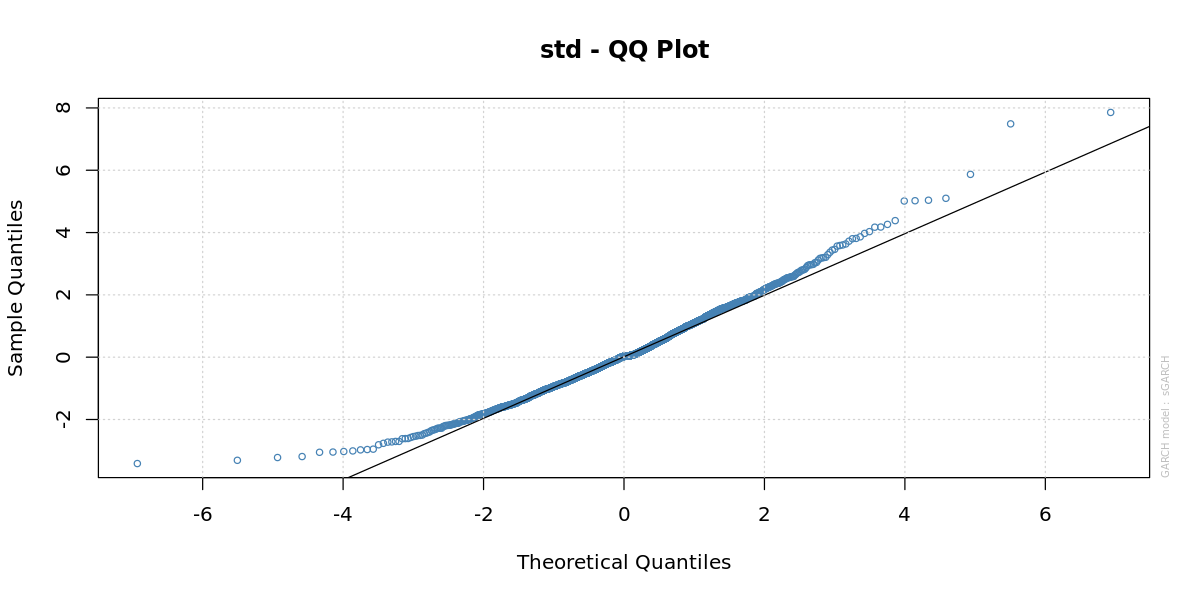

In [306]:
##QQ-plot for fitted GARCH Model with t distribution
plot(garch.fit.t, which=9)

In [309]:
#Model selection usinh information criterion
model.list = list("arch(1,1)" = arch11.fit,
                  "arch(1,1).t" = arch11.fit.t,
                  "garch(1,1)" = garch.fit,
                  "garch(1,1).t" = garch.fit.t)
info.mat = sapply(model.list, infocriteria)
rownames(info.mat) = rownames(infocriteria(garch.fit))
info.mat

,"arch(1,1)","arch(1,1).t","garch(1,1)","garch(1,1).t"
Akaike,-5.020667,-5.210102,-5.258635,-5.340267
Bayes,-5.015645,-5.203406,-5.251939,-5.331897
Shibata,-5.020668,-5.210104,-5.258638,-5.340271
Hannan-Quinn,-5.018880,-5.207720,-5.256253,-5.337289
